## Introduction

In the rapidly evolving retail landscape, BigMart, a prominent retail chain, has taken a forward step by amassing a comprehensive dataset detailing sales transactions from the year 2013. This expansive dataset encompasses information on a staggering 1559 distinct products, distributed across an extensive network of 10 diverse stores, each situated in different cities. In addition to sales figures, the dataset also captures a variety of attributes linked to both individual products and specific stores.

The central ambition driving this data-driven initiative is to construct a potent predictive model capable of furnishing accurate sales forecasts for each individual product within a particular store. By harnessing the power of predictive analytics, BigMart aspires to unearth the intricate interplay between product attributes, store characteristics, and sales performance. This predictive model serves as a cornerstone in the company's quest to unravel the underlying factors that hold the key to augmenting sales.

In summation, the overarching goal of this data science project is twofold: to construct a robust and precise predictive model for sales estimation, and to delve into the intricacies of products and stores that wield a pivotal influence on sales enhancement. By reconciling the complexities of missing data, the project seeks to provide BigMart with a transformative tool that propels it into an era of data-informed decision-making, strategic refinement, and maximized sales performance.

### Importance of Big Mart Sales prediction using Machine learning algorithms:

Importance of Big Mart Sales prediction using Machine learning algorithms: Predicting Big Mart sales using machine learning algorithms carries significant importance for both the retail industry and the business itself. Here are some key reasons why sales prediction is crucial:

Optimized Inventory Management
Minimized Costs
Enhanced Customer Satisfaction
Effective Marketing Strategies
Resource Allocation
Seasonal and Trend Analysis
Seasonal and Trend Analysis
Supply Chain Efficiency
Financial Planning
Competitive Advantage
Personalized Customer Experience
Operational Efficiency

### Problem Statement

The problem revolves around predicting the sales of various products in different outlets based on certain features like item weight, item fat content, item visibility, item type, maximum retail price (MRP), outlet identifier, establishment year of the outlet, outlet size, outlet location type, and outlet type. The objective is to build a predictive model that can accurately estimate the sales of products in these outlets, enabling better inventory management and business planning.

### Hypothesis Generation

Item Weight Impact: Heavier items might have higher sales due to their larger quantities, assuming other factors remain constant.

Item Fat Content Influence: Items labeled as 'Low Fat' might be perceived as healthier, potentially leading to higher sales.

Item Visibility Significance: Items with higher visibility could attract more attention and hence, lead to higher sales.

Item Type Variation: Different item types could have varying demand patterns. Certain types might be more popular, resulting in higher sales.

MRP Impact: Higher MRP items might have fewer sales unless the product offers unique features or quality.

Outlet Size Effect: Larger outlets might experience higher sales due to increased customer footfall and variety of products.

Outlet Location Influence: Outlets located in different types of areas might experience varying sales patterns.

Outlet Type Variation: Different outlet types could lead to different sales trends. For example, supermarkets might experience higher sales than grocery stores.

### Importing Libraries

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

sns.set()

In [5]:
df_test=pd.read_csv('test_bb.csv')
df_train=pd.read_csv('train_bb.csv')

### Understanding of Data

The dataset includes information about different items and their sales in various outlets.

Features include item identifier, weight, fat content, visibility, type, MRP, outlet identifier, establishment year, size, location type, and type of outlet.

The train data contains 8523 rows and 12 columns. The test data contains 5681 rows and 11 columns.

Missing data is present in the 'item weight' and 'outlet size' columns.

The missing values in Categorical variables can be filled with Mode and the numerical variables with mean or median.

Categorical variables include item fat content, item type, outlet size, outlet location type, and outlet type.

Numerical variables include item weight, item visibility, MRP, and establishment year.

The target variable is the sales of items.

In [6]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [7]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [8]:
df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [9]:
df_train.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [10]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
df_train.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [12]:
df_train.describe(include='all')
     

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [13]:
df_train.shape

(8523, 12)

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [15]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Checking missing values

In [16]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
df_train.duplicated().sum()

0

In [18]:
df_train.duplicated().any()

False

In [19]:
df_train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Here are some null values in Item_weight and outlet_size

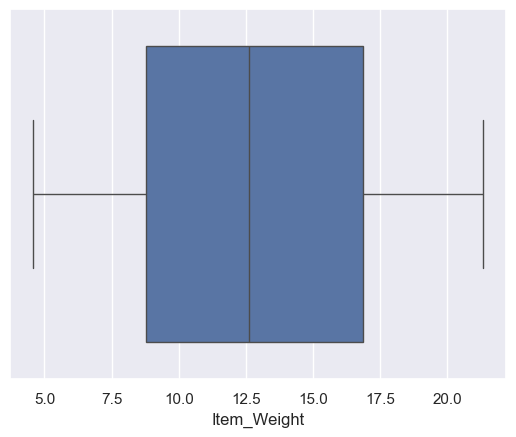

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df_train['Item_Weight'])
plt.show()

In [21]:
# getting categorical and numerical columns
categorical_cols = df_train.select_dtypes(exclude='number').columns.to_list()
numerical_cols = df_train.select_dtypes(include='number').columns.to_list()


In [22]:
print('Categorical Columns: ', categorical_cols)
print('Numerical Columns: ', numerical_cols)

Categorical Columns:  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Numerical Columns:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [23]:
# exploring categories
for i in df_train:
    print('-----------------------------')
    print('Series: ', i)
    print('-----------------------------')
    print(df_train[i].value_counts())
    print('\n')

-----------------------------
Series:  Item_Identifier
-----------------------------
Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64


-----------------------------
Series:  Item_Weight
-----------------------------
Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: count, Length: 415, dtype: int64


-----------------------------
Series:  Item_Fat_Content
-----------------------------
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


-----------------------------
Series:  Item_Visibility
-----------------------------
Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646

### Notes :

The dataset 8523 contains datapoints (rows) and 12 features (columns). The dataset is for 1559 items in 10 different stores. There are present categorical (object) and numerical features (float, int). The target is the _'Item_OutletSales' feature. Some features presents null values and outliers. There are no duplicate rows. _ItemIdentifier:

Ids for 1559 different items. The ids has some prefixes: FD=Food, DR=Drink, NC=Non-Consumable. _ItemWeight:

It contains null values. _Item_FatContent:

It has 5 different categories, but some of them do reference to an existing category, it can be summarized to two categories: Low Fat and Regular. This feature do not apply to Non-Consumable items, a new category for them can be created.

_ItemVisibility:Some values are 0%, an item can not be bought by a consumer if its not visible, this is an outlier. _ItemType:

There are 16 different item types, the data is not well distributed among all of them. The model can be biased towards the most repetitive types: Fruits and Vegetables and Snack Foods. _OutletIdentifier:

There are 10 different outlet ids. The data seems to be pretty well distributed among all the outlets. _OutletSize:

It has null values. The data is not well distributed among the different sizes. The _OuletSize has some relation with the _OuletType that need to be considered when the null values be filled. _Outlet_Location_Type and OutletType:

The data is not well distributed among the different sizes. The model can be biased towards the most repetitive types

### Data Cleaning

In [24]:
# make a copy of the data
clean_data = df_train.copy()

In [25]:
# format column names to be lower-case
new_col_names = [col.lower() for col in clean_data.columns]
clean_data.columns = new_col_names

print(clean_data.columns)

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales'],
      dtype='object')


In [26]:
# fill null values using the mean
clean_data['item_weight'].fillna(clean_data['item_weight'].mean(), inplace=True)
clean_data.isna().sum()

item_identifier                 0
item_weight                     0
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  2410
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

In [27]:
# getting mode based on outlet_type
outlet_size_mode_pt = clean_data.pivot_table(values='outlet_size',
                                                      columns='outlet_type',
                                                      aggfunc=lambda x: x.mode())
outlet_size_mode_pt

outlet_type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
outlet_size,Small,Small,Medium,Medium


In [28]:
# fill null values using the mode per oulet_type
missing_values = clean_data['outlet_size'].isnull()
clean_data.loc[missing_values, 'outlet_size'] = clean_data.loc[missing_values, 'outlet_type'].apply(lambda x: outlet_size_mode_pt[x].outlet_size)
clean_data.isna().sum()

item_identifier              0
item_weight                  0
item_fat_content             0
item_visibility              0
item_type                    0
item_mrp                     0
outlet_identifier            0
outlet_establishment_year    0
outlet_size                  0
outlet_location_type         0
outlet_type                  0
item_outlet_sales            0
dtype: int64

In [29]:
# print total number of 0s
print('Total of 0s before replace: ', sum(clean_data['item_visibility'] == 0))

# replace 0s with the mean
clean_data.loc[:,'item_visibility'].replace(to_replace=0,
                                            value=clean_data['item_visibility'].mean(),
                                            inplace=True)

# print total number of 0s after the replace
print('Total of 0s after replace: ', sum(clean_data['item_visibility'] == 0))

Total of 0s before replace:  526
Total of 0s after replace:  0


Replace _'item_fatcontent' values

In [30]:
# print values
print(clean_data['item_fat_content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [31]:
# replace the repetitive values
clean_data['item_fat_content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}, inplace=True)
clean_data['item_fat_content'].value_counts()

item_fat_content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [32]:
# create a new feature using the two first letters of the item_identifier
clean_data['item_category'] = clean_data['item_identifier'].apply(lambda x: x[:2])
clean_data['item_category'] = clean_data['item_category'].replace({'FD':'Food', 'DR':'Drink', 'NC':'Non-Consumable'})
clean_data['item_category'].value_counts()

item_category
Food              6125
Non-Consumable    1599
Drink              799
Name: count, dtype: int64

6.5. Create a new 'item_category' feature

In [33]:
# adding a new item item_fat_content category for non-consumable items
clean_data.loc[clean_data['item_category'] == 'Non-Consumable', 'item_fat_content'] = 'No Edible'
clean_data['item_fat_content'].value_counts()

item_fat_content
Low Fat      3918
Regular      3006
No Edible    1599
Name: count, dtype: int64

Update _'item_fatcontent' for Non-Consumables

In [ ]:
# adding a new item item_fat_content category for non-consumable items
clean_data.loc[clean_data['item_category'] == 'Non-Consumable', 'item_fat_content'] = 'No Edible'
clean_data['item_fat_content'].value_counts()

### 6.7. Create a new 'outlet_years' feature

In [34]:
# the new feature tell us how old is the outlet
clean_data['outlet_years'] = 2013 - clean_data['outlet_establishment_year']
clean_data['outlet_years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: outlet_years, Length: 8523, dtype: int64

### 7. Analyze And Visualize The Data

### Exploratory Data Analysis (EDA):

In [35]:
df_train=clean_data.copy()

In [36]:
# getting categorical and numerical columns
categorical_cols = ['item_fat_content', 'item_type',  'outlet_size', 'outlet_location_type', 'outlet_type']
numerical_cols = ['item_weight', 'item_visibility', 'item_mrp', 'outlet_establishment_year', 'item_outlet_sales']
print('Categorical Columns: ', categorical_cols)
print('Numerical Columns: ', numerical_cols)

Categorical Columns:  ['item_fat_content', 'item_type', 'outlet_size', 'outlet_location_type', 'outlet_type']
Numerical Columns:  ['item_weight', 'item_visibility', 'item_mrp', 'outlet_establishment_year', 'item_outlet_sales']


In [37]:
df_train.isnull().sum()

item_identifier              0
item_weight                  0
item_fat_content             0
item_visibility              0
item_type                    0
item_mrp                     0
outlet_identifier            0
outlet_establishment_year    0
outlet_size                  0
outlet_location_type         0
outlet_type                  0
item_outlet_sales            0
item_category                0
outlet_years                 0
dtype: int64

### Univariate Analysis

#### Numerical Columns

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

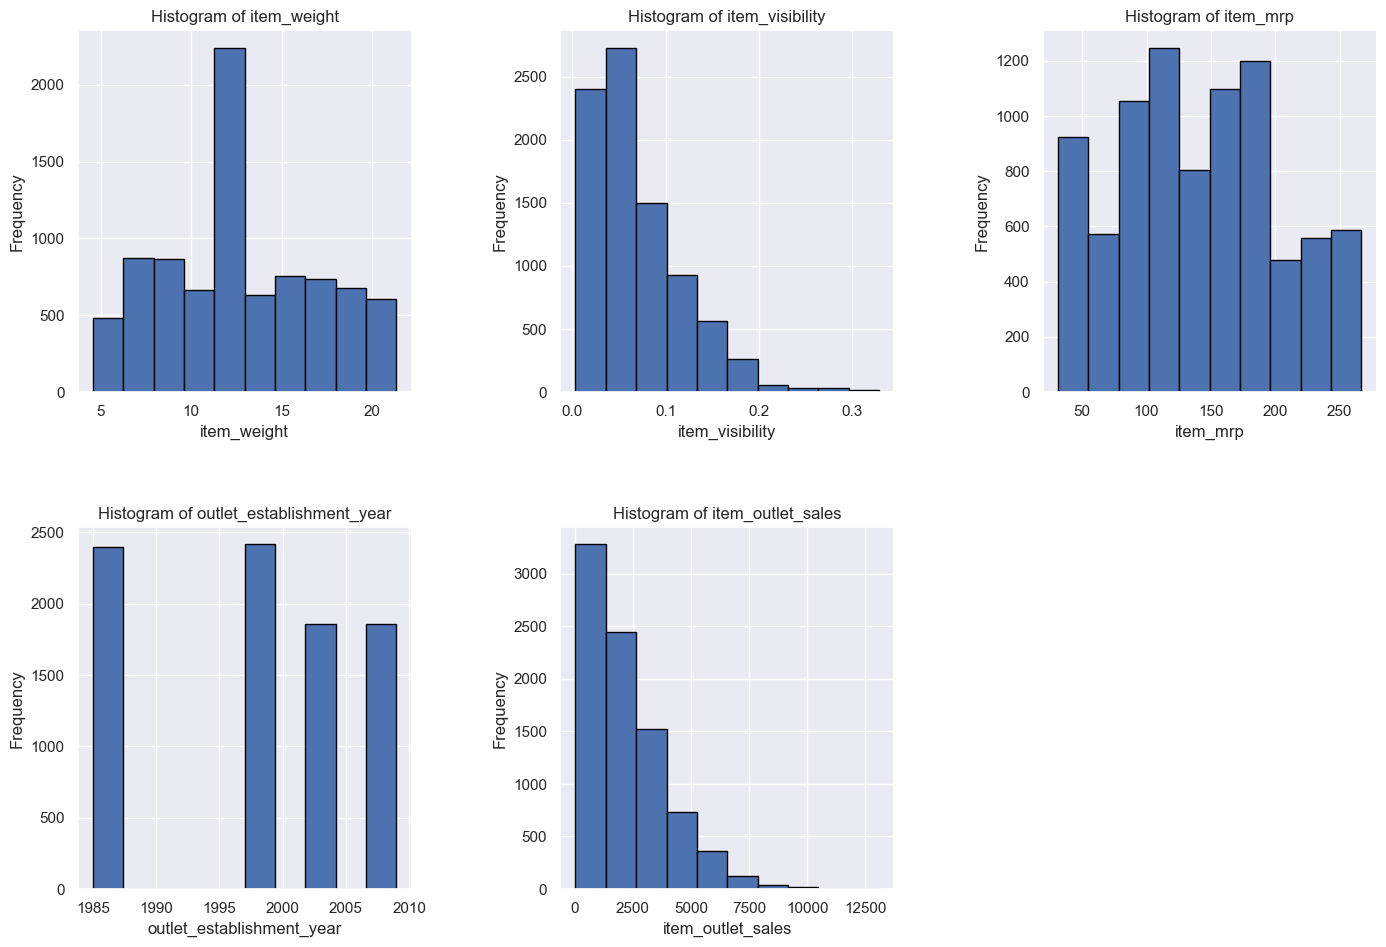

In [39]:
plt.figure(figsize=[15, 30])
for idx,column in enumerate(numerical_cols,start=1):
  plt.subplot(6,3,idx)
  plt.hist(df_train[column], bins=10, edgecolor='black')
  plt.xlabel(f'{column}')
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {column}')
  plt.tight_layout(pad=4)
plt.show()
     

#### The histogram plot for the variable 'item_weight' is found to be almost normally distributed.

- The histogram plot for the variable 'item_visibility' and 'item_outlet_sales' is found to be almost positively skewed.

- The histogram plot for the variable 'item_mrp' is found to be almost normally distributed.

- The plot for the variable 'outlet_establishment_year' shows that the sale declined after the establishment year-2000.

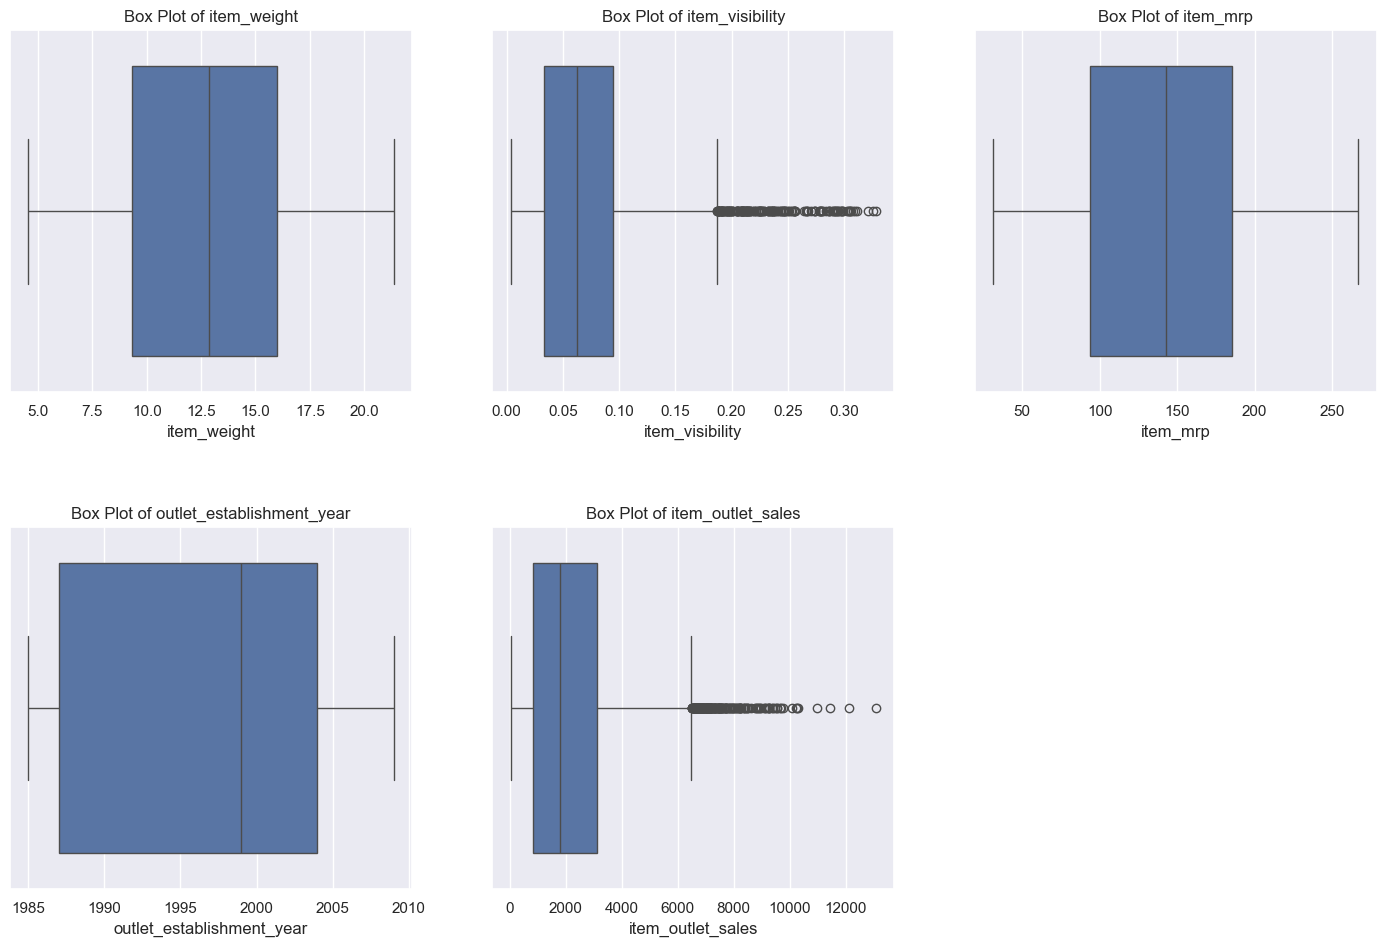

In [40]:
plt.figure(figsize=[15, 30])
for idx,column in enumerate(numerical_cols,start=1):
  plt.subplot(6,3,idx)
  sns.boxplot(x=df_train[column])
  plt.xlabel(f'{column}')
  plt.title(f'Box Plot of {column}')
  plt.tight_layout(pad=4)
plt.show()
     

#### The box plot for the variable 'item_visibility' and 'item_outlet_sale' is found to be containing some outliers.

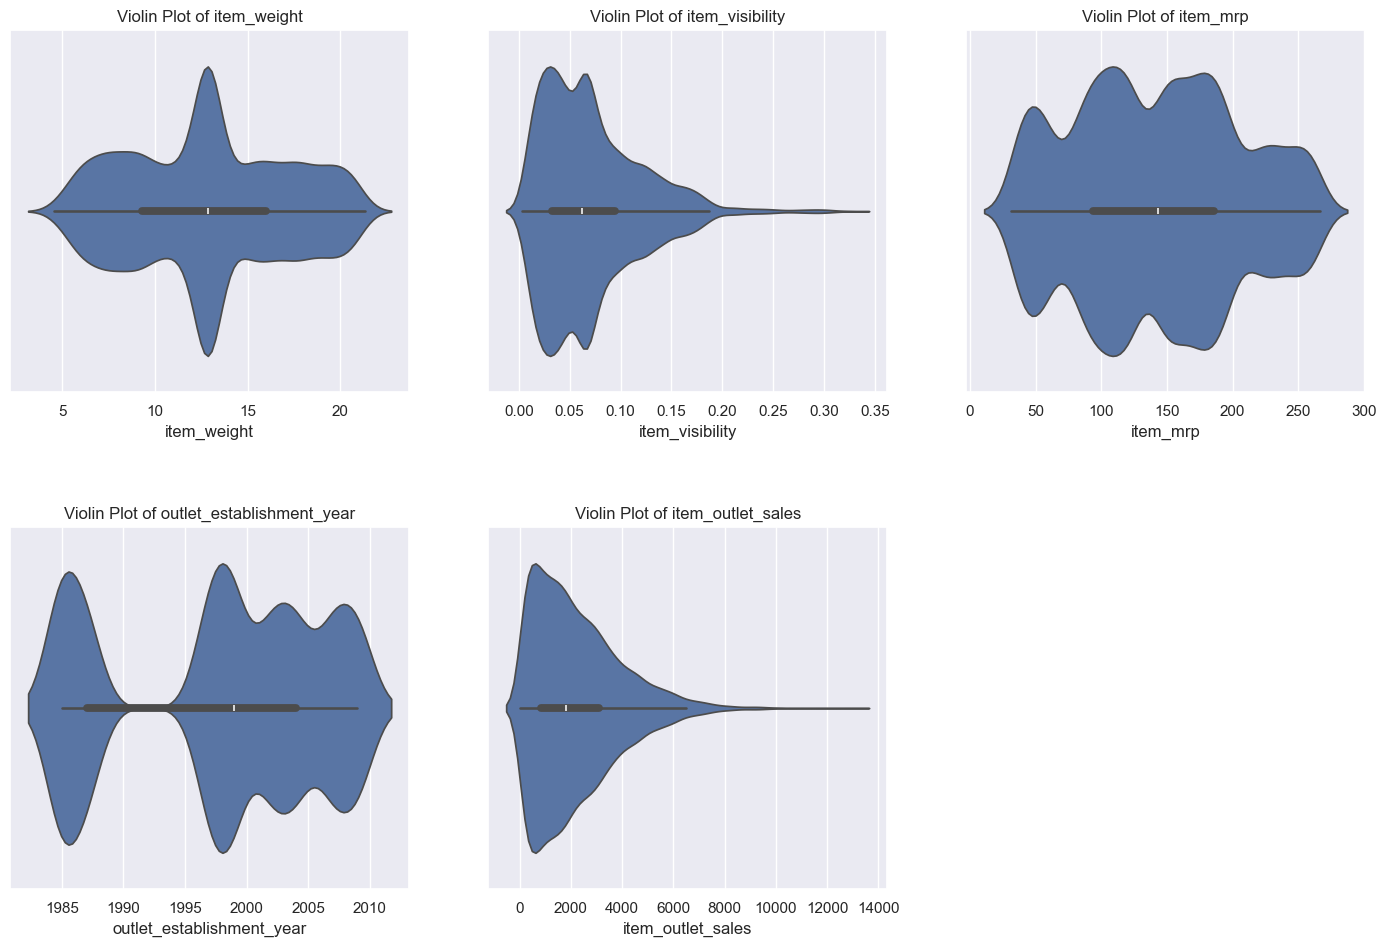

In [41]:
plt.figure(figsize=[15, 30])
for idx,column in enumerate(numerical_cols,start=1):
  plt.subplot(6,3,idx)
  sns.violinplot(x=df_train[column])
  plt.xlabel(f'{column}')
  plt.title(f'Violin Plot of {column}')
  plt.tight_layout(pad=4)
plt.show()
     


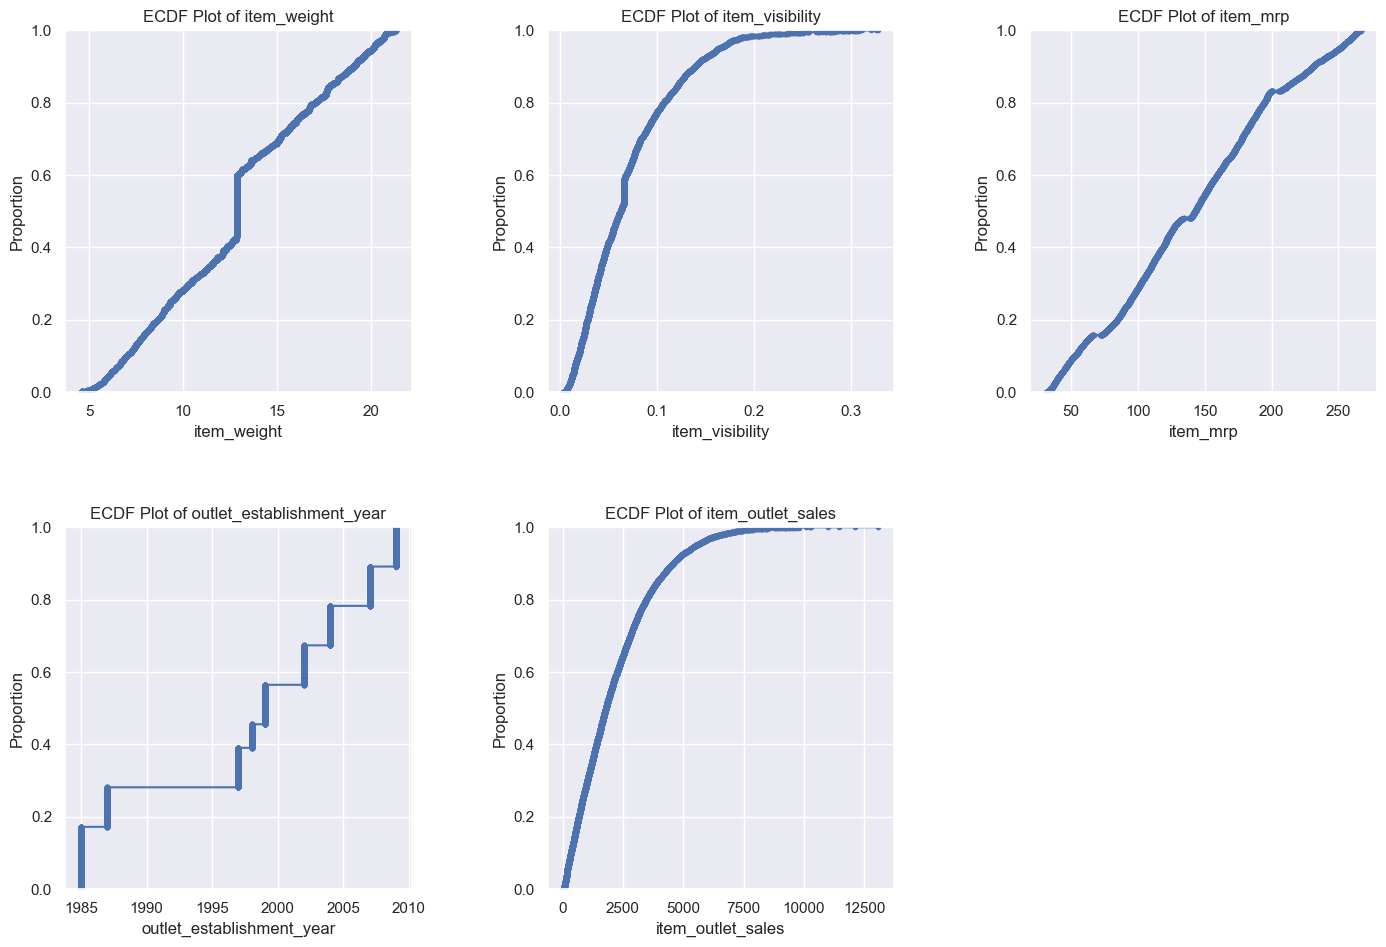

In [42]:
plt.figure(figsize=[15, 30])
for idx,column in enumerate(numerical_cols,start=1):
  plt.subplot(6,3,idx)
  plt.tight_layout(pad=4)
  sns.ecdfplot(data=df_train[column], marker='.')
  plt.xlabel(f'{column}')
  plt.ylabel('Proportion')
  plt.title(f'ECDF Plot of {column}')
  plt.tight_layout(pad=4)
plt.show()

In [44]:
cols_for_bar=['outlet_establishment_year','outlet_type','item_fat_content','item_type','outlet_location_type']

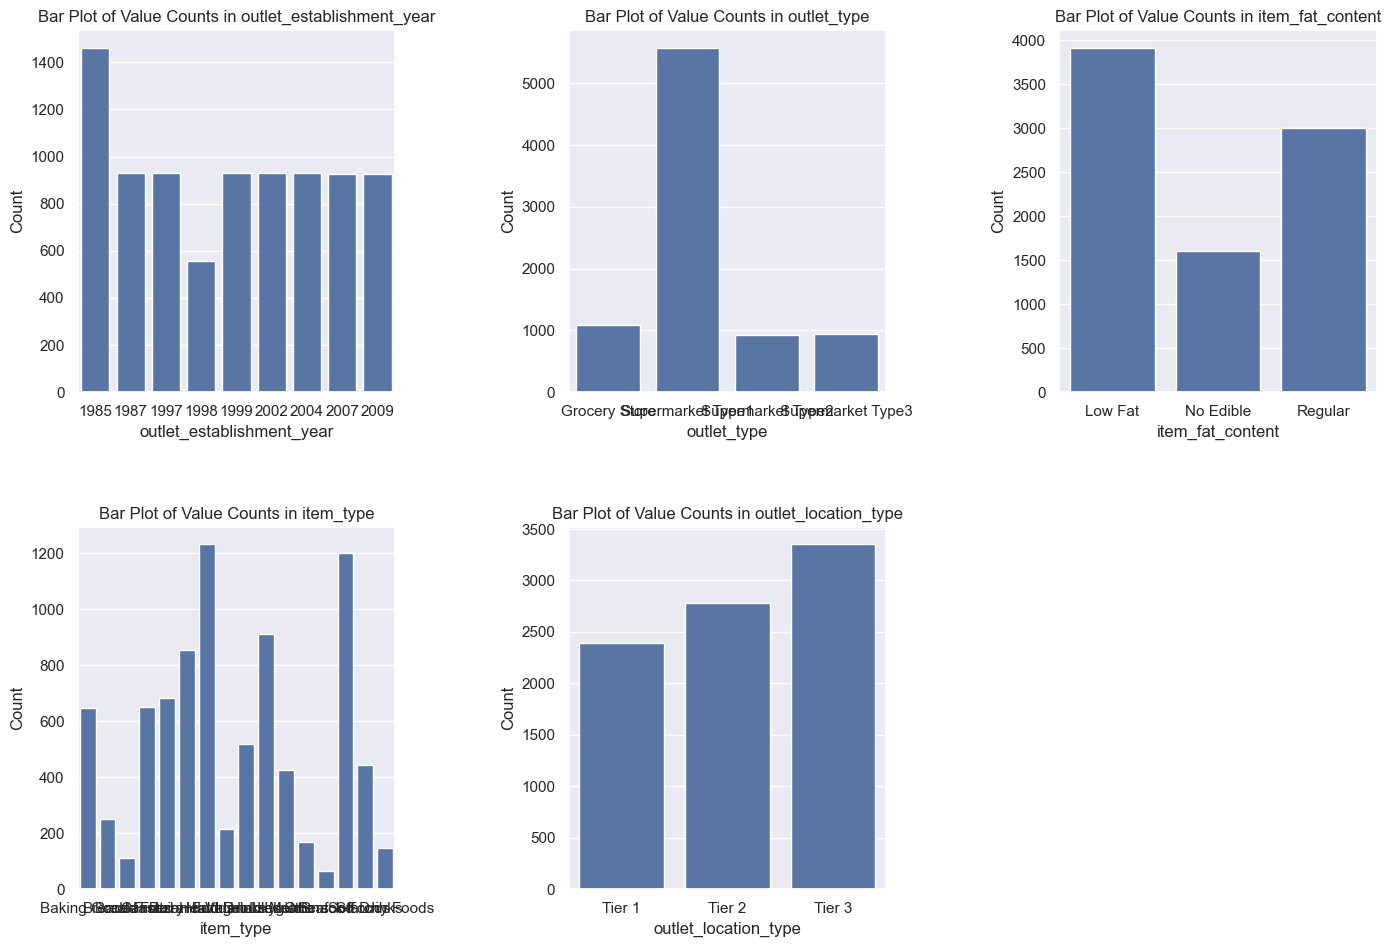

In [45]:
plt.figure(figsize=[15, 30])
for idx,column in enumerate(cols_for_bar,start=1):
  plt.subplot(6,3,idx)
  value_counts = df_train[column].value_counts().sort_index()
  sns.barplot(x=value_counts.index, y=value_counts.values)
  plt.xlabel(f'{column}')
  plt.ylabel('Count')
  plt.title(f'Bar Plot of Value Counts in {column}')
  plt.tight_layout(pad=4)
plt.show()
     

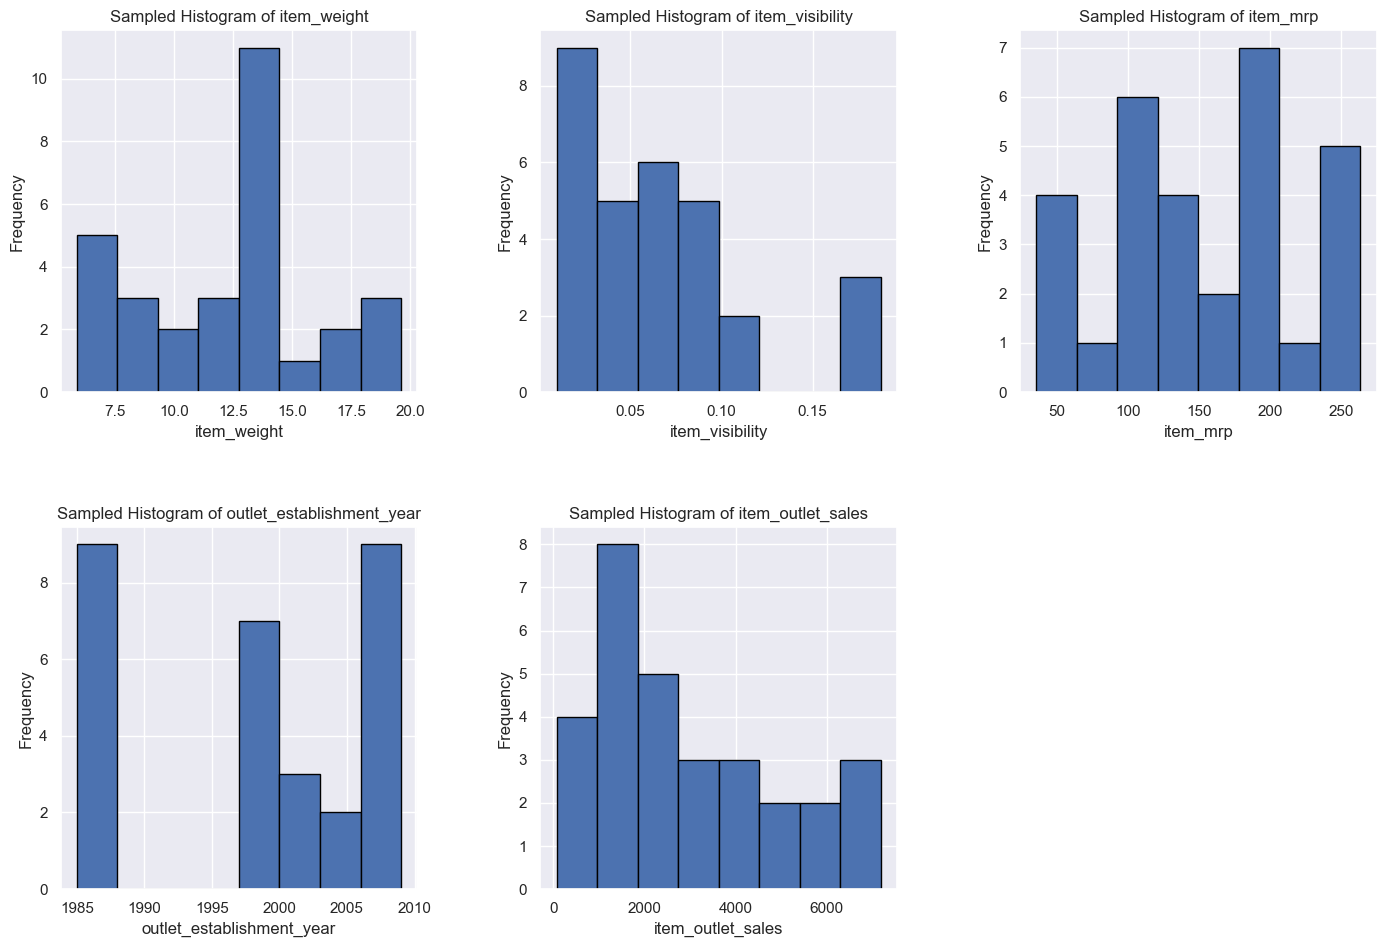

In [46]:
plt.figure(figsize=[15, 30])
for idx,column in enumerate(numerical_cols,start=1):
  plt.subplot(6,3,idx)
  sample_size = 30  # Number of data points to sample
  sampled_data = df_train[column].sample(sample_size)
  plt.hist(sampled_data, bins=8, edgecolor='black')
  plt.xlabel(f'{column}')
  plt.ylabel('Frequency')
  plt.title(f'Sampled Histogram of {column}')
  plt.tight_layout(pad=4)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_10412\2431590525.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train[f'{column}'], shade=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_10412\2431590525.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train[f'{column}'], shade=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_10412\2431590525.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train[f'{column}'], shade=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_10412\2431590525.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn 

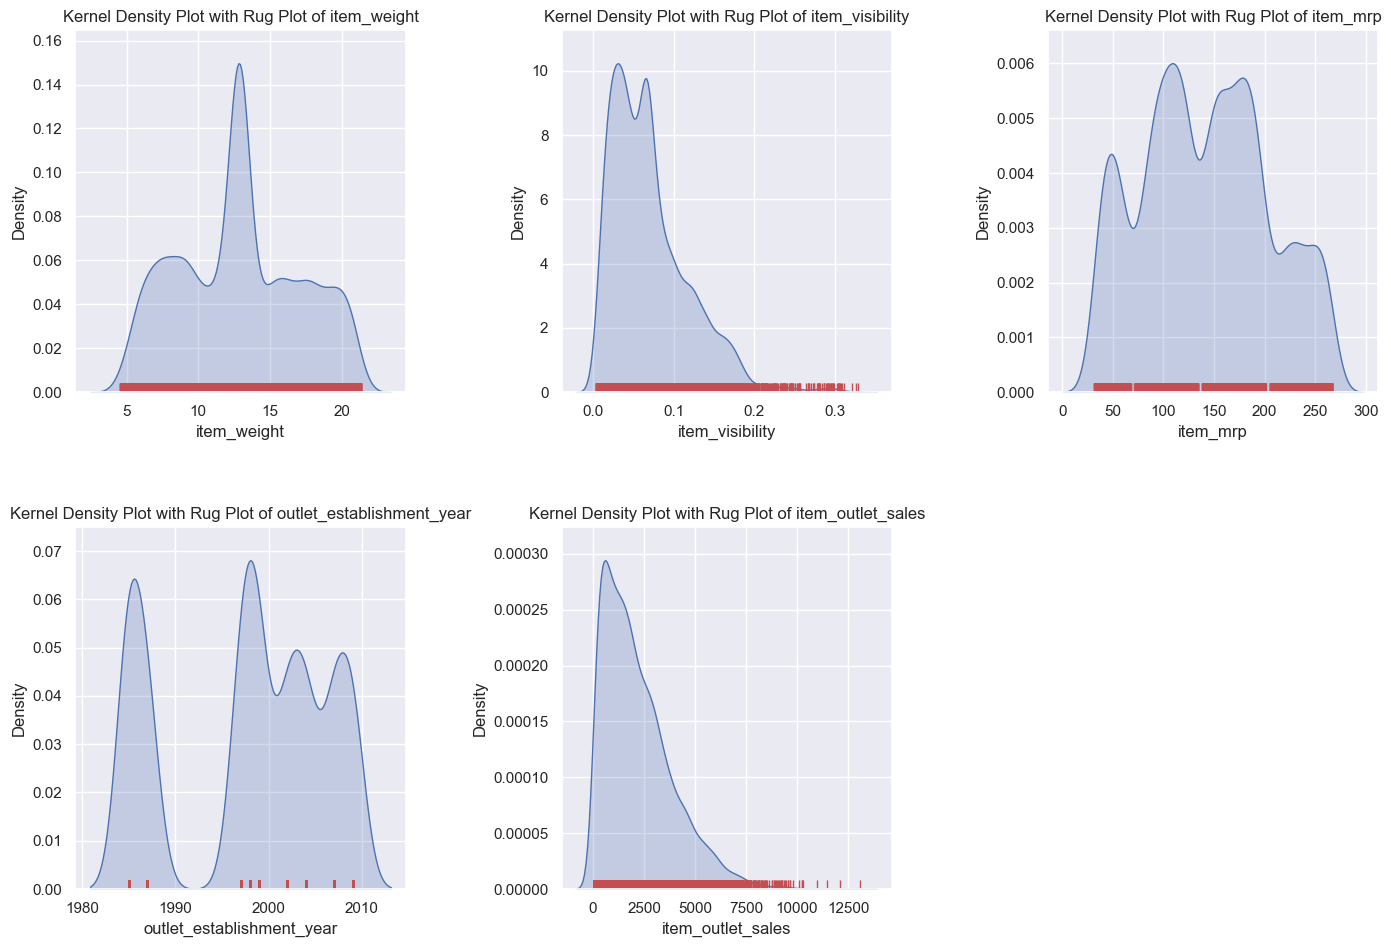

In [47]:
plt.figure(figsize=[15, 30])
for idx,column in enumerate(numerical_cols,start=1):
  plt.subplot(6,3,idx)
  sns.kdeplot(df_train[f'{column}'], shade=True)
  sns.rugplot(df_train[f'{column}'], color='r')
  plt.xlabel(f'{column}')
  plt.ylabel('Density')
  plt.title(f'Kernel Density Plot with Rug Plot of {column}')
  plt.tight_layout(pad=4)
plt.show()
     

In [49]:
plt.figure(figsize=[15, 30]) for idx,column in enumerate(numerical_cols,start=1): plt.subplot(6,3,idx) sns.sawrmplot(x=df_train[column]) plt.xlabel(f'{column}') plt.title(f'Swarm Plot of {column}') plt.tight_layout(pad=4) plt.show()

SyntaxError: invalid syntax (2029229164.py, line 1)

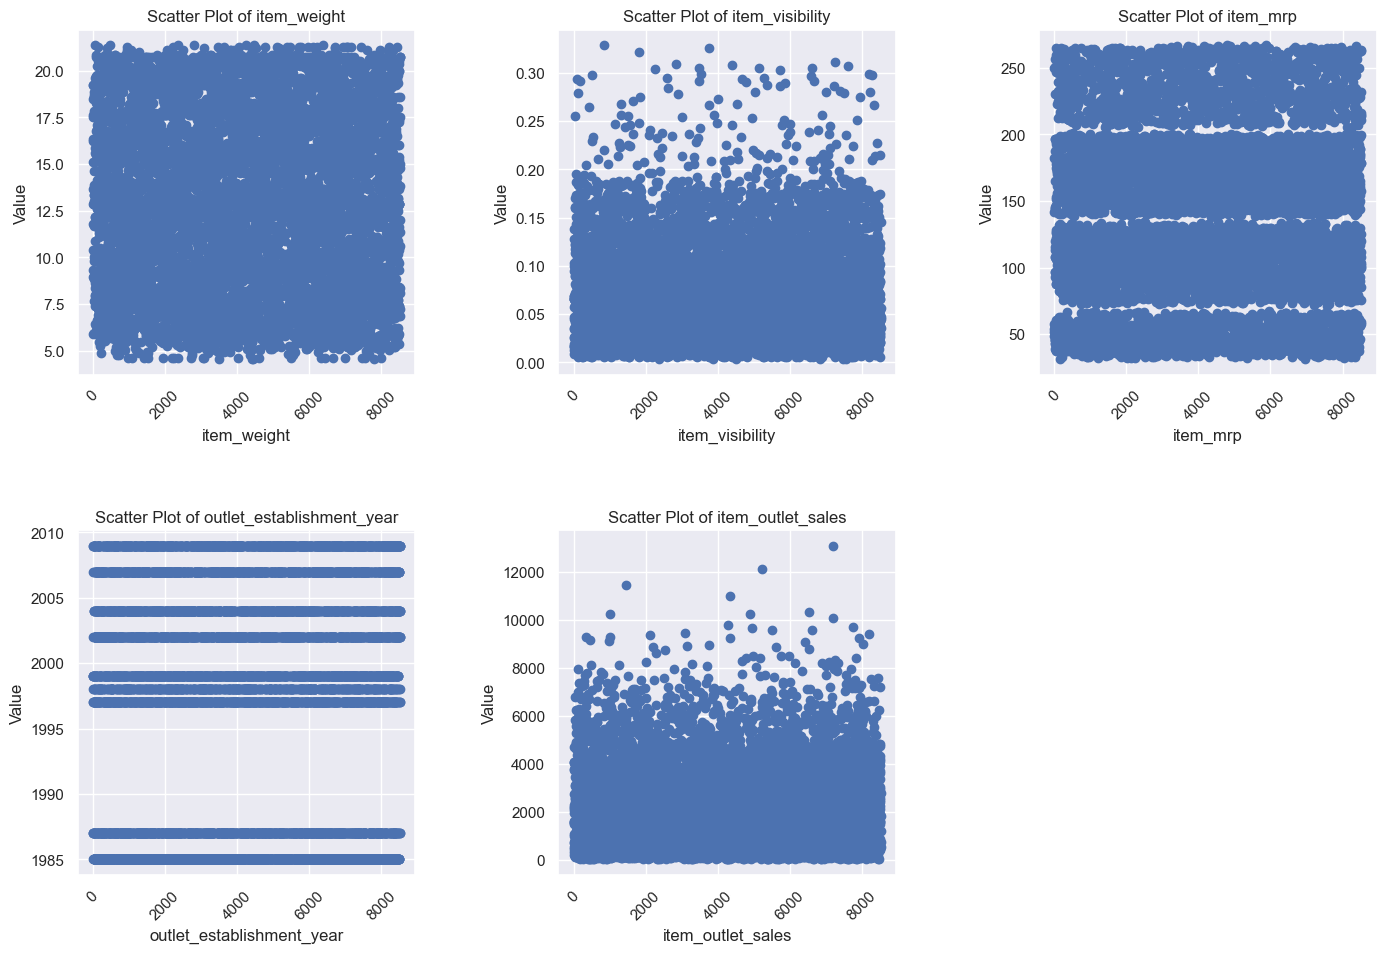

In [48]:
plt.figure(figsize=[15, 30])
for idx,column in enumerate(numerical_cols,start=1):
  plt.subplot(6,3,idx)
  plt.scatter(df_train.index,df_train[column])
  plt.xlabel(f'{column}')
  plt.ylabel('Value')
  plt.title(f'Scatter Plot of {column}')
  plt.xticks(rotation=45)
  plt.tight_layout(pad=4)
plt.show()
     

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


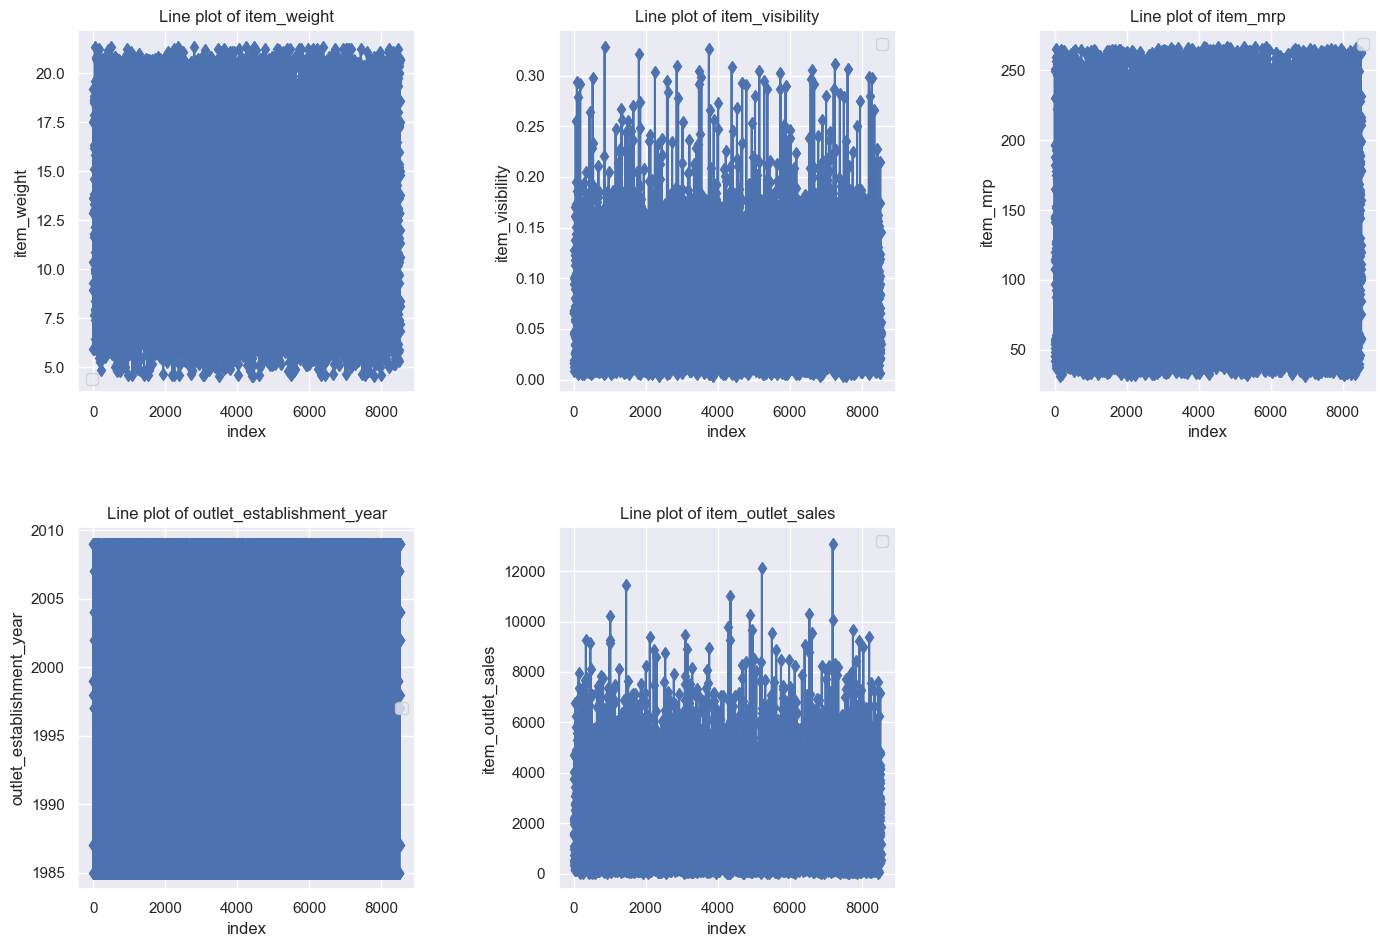

In [50]:
plt.figure(figsize=[15, 30])
for idx,column in enumerate(numerical_cols,start=1):
  plt.subplot(6,3,idx)
  plt.plot(df_train.index,df_train[column],marker='d')
  plt.title(f'Line plot of {column}')
  plt.xlabel('index')
  plt.ylabel(f'{column}')
  plt.legend()
  plt.tight_layout(pad=4)
plt.show()

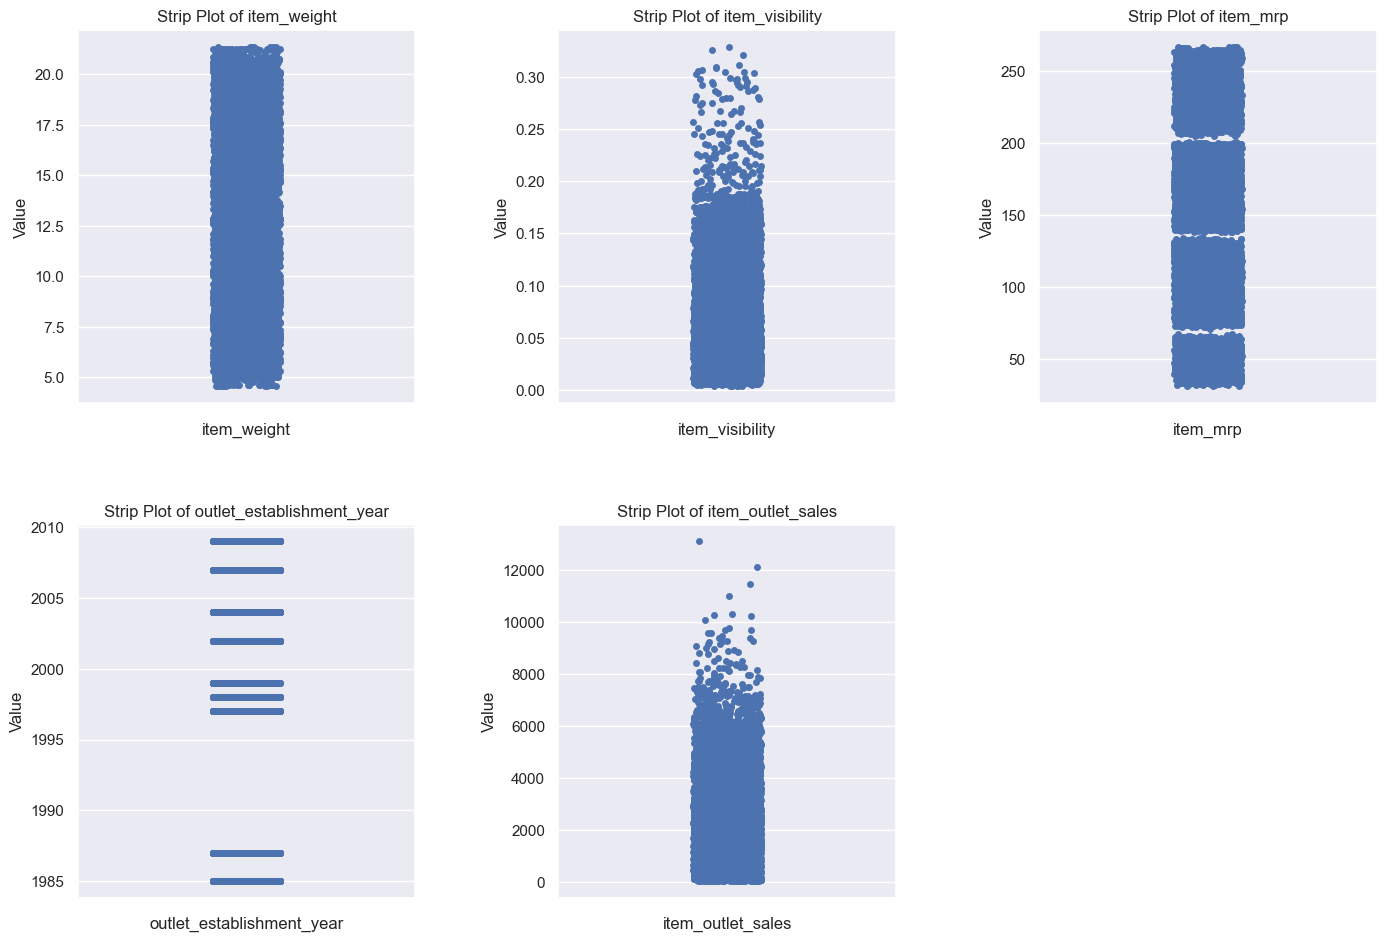

In [51]:
plt.figure(figsize=[15, 30])
for idx,column in enumerate(numerical_cols,start=1):
  plt.subplot(6,3,idx)
  sns.stripplot(y=df_train[column])
  plt.xlabel(f'{column}')
  plt.ylabel('Value')
  plt.title(f'Strip Plot of {column}')
  plt.xticks(rotation=45)
  plt.tight_layout(pad=4)
plt.show()
     

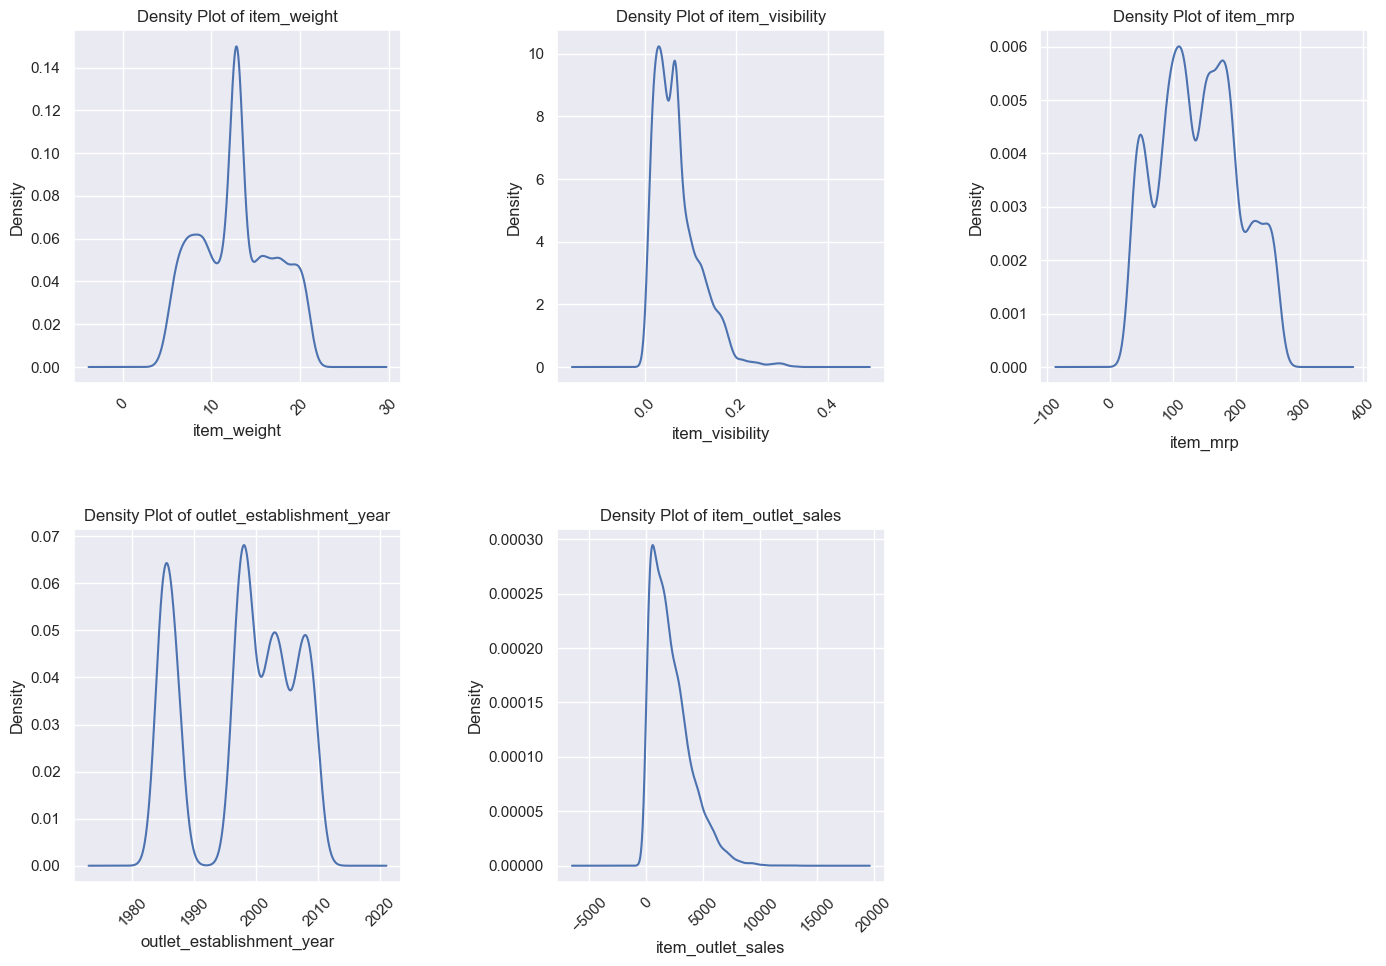

In [52]:
plt.figure(figsize=[15, 30])
for idx,column in enumerate(numerical_cols,start=1):
  plt.subplot(6,3,idx)
  plt.xlabel(f'{column}')
  plt.ylabel('Density')
  plt.title(f'Density Plot of {column}')
  df_train[column].plot(kind='density')
  plt.xticks(rotation=45)
  plt.tight_layout(pad=4)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_10412\2611989380.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[column],color='black',rug=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_10412\2611989380.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[column],color='black',

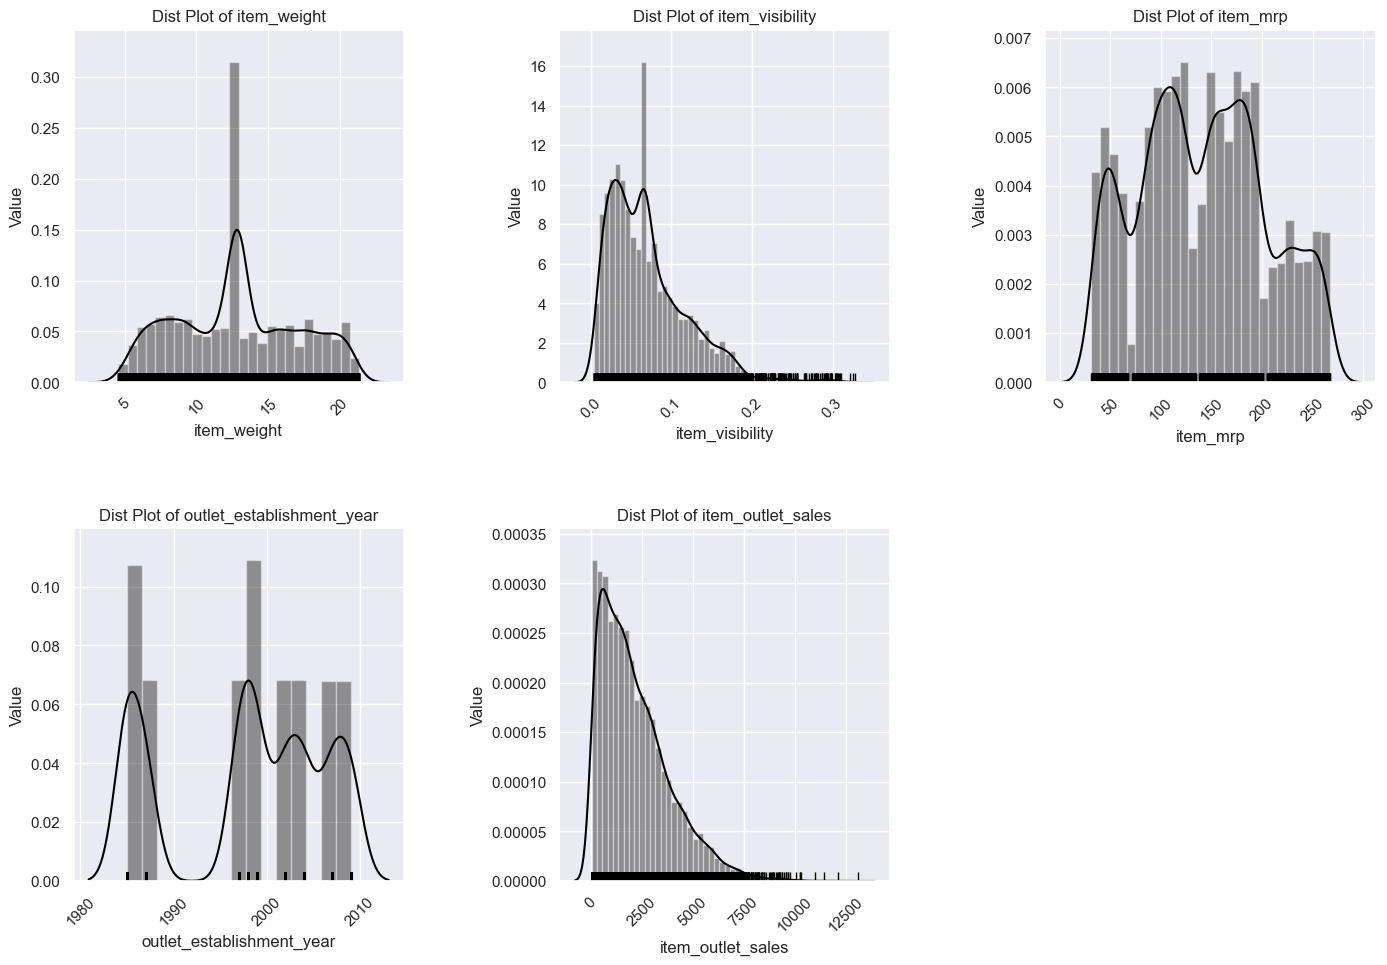

In [53]:
plt.figure(figsize=[15, 30])
for idx,column in enumerate(numerical_cols,start=1):
  plt.subplot(6,3,idx)
  sns.set(rc={'figure.figsize':(6,6)})
  sns.distplot(df_train[column],color='black',rug=True)
  plt.xlabel(f'{column}')
  plt.ylabel('Value')
  plt.title(f'Dist Plot of {column}')
  plt.xticks(rotation=45)
  plt.tight_layout(pad=4)
plt.show()
     

### Categorical Variable

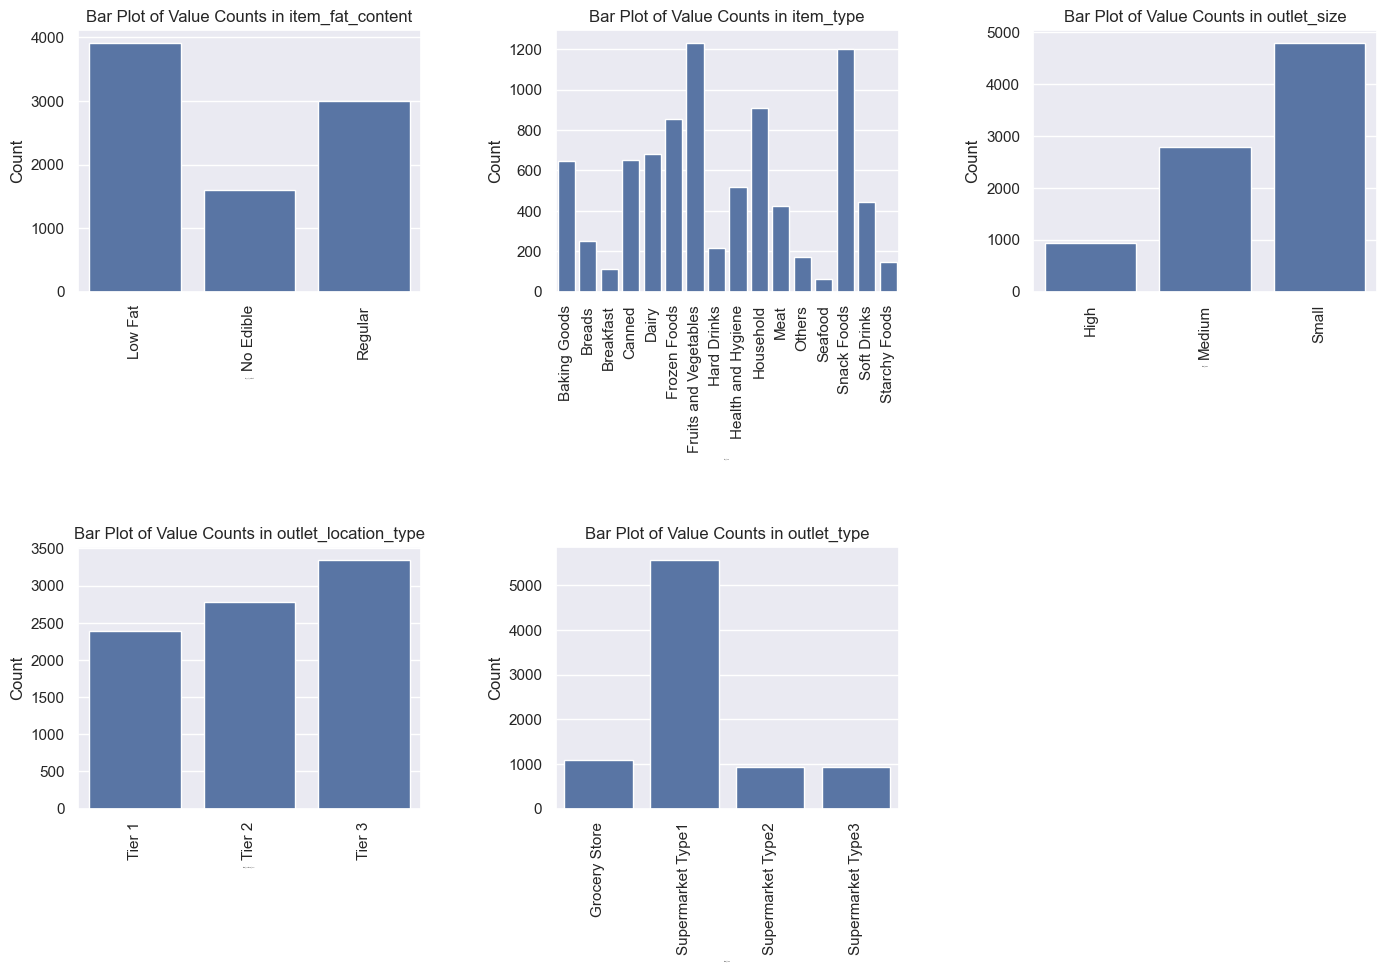

In [54]:
plt.figure(figsize=[15, 30])
for idx,column in enumerate(categorical_cols,start=1):
  plt.subplot(6,3,idx)
  value_counts = df_train[column].value_counts().sort_index()
  sns.barplot(x=value_counts.index, y=value_counts.values)
  plt.xlabel(f'{column}',fontsize=0.1)
  plt.ylabel('Count')
  plt.title(f'Bar Plot of Value Counts in {column}')
  plt.xticks(rotation=90)
  plt.tight_layout(pad=4)
plt.show()
     

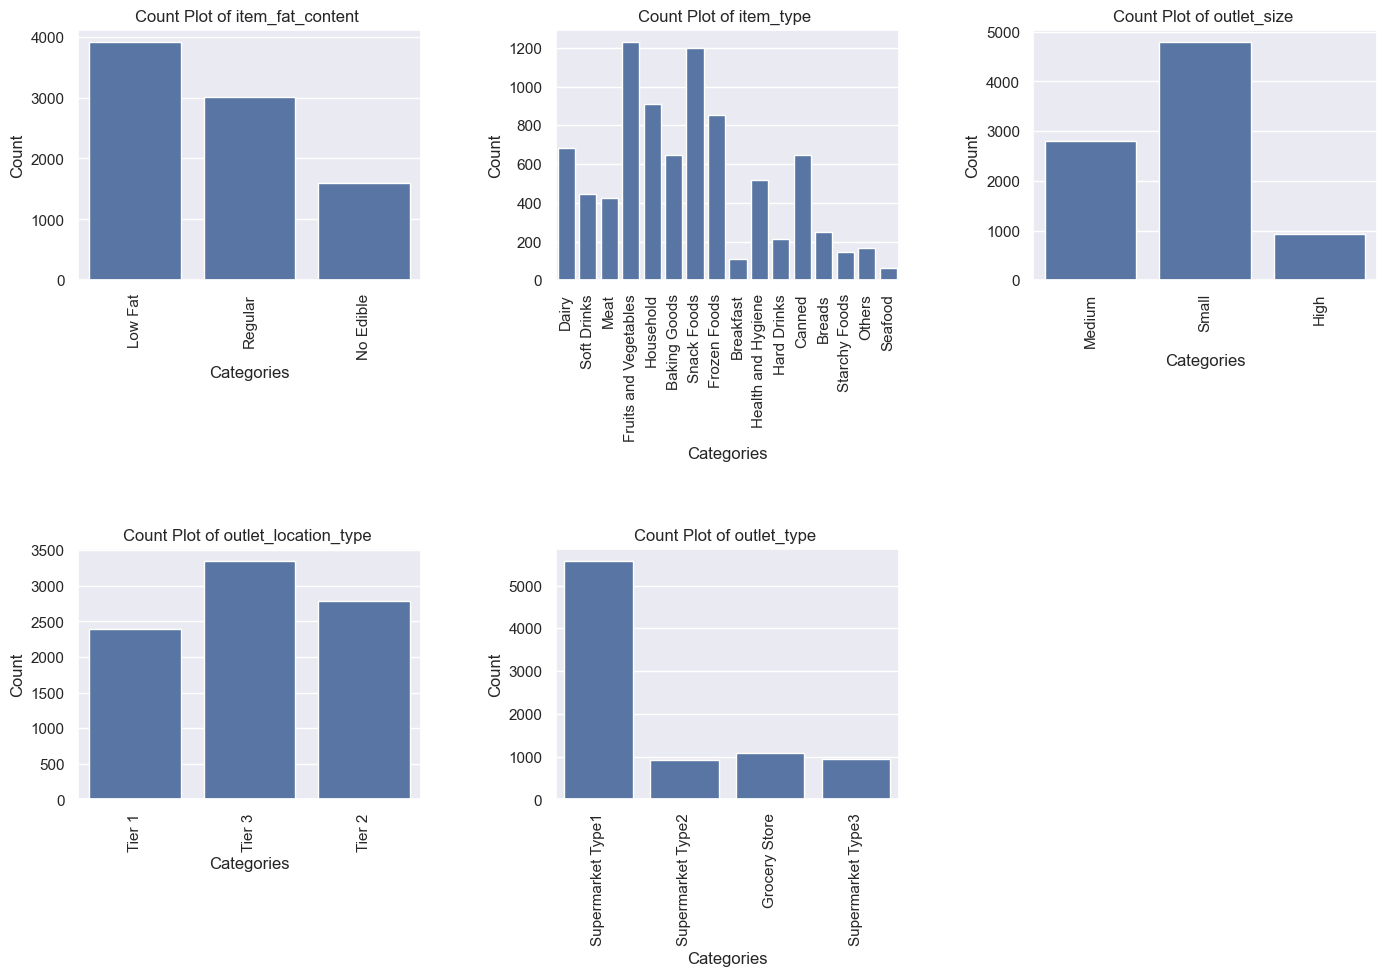

In [55]:
plt.figure(figsize=[15, 30])
for idx,column in enumerate(categorical_cols,start=1):
  plt.subplot(6,3,idx)
  sns.countplot(x=df_train[column])
  plt.xlabel('Categories')
  plt.ylabel('Count')
  plt.title(f'Count Plot of {column} ')
  plt.xticks(rotation=90)
  plt.tight_layout(pad=4)
plt.show()
     

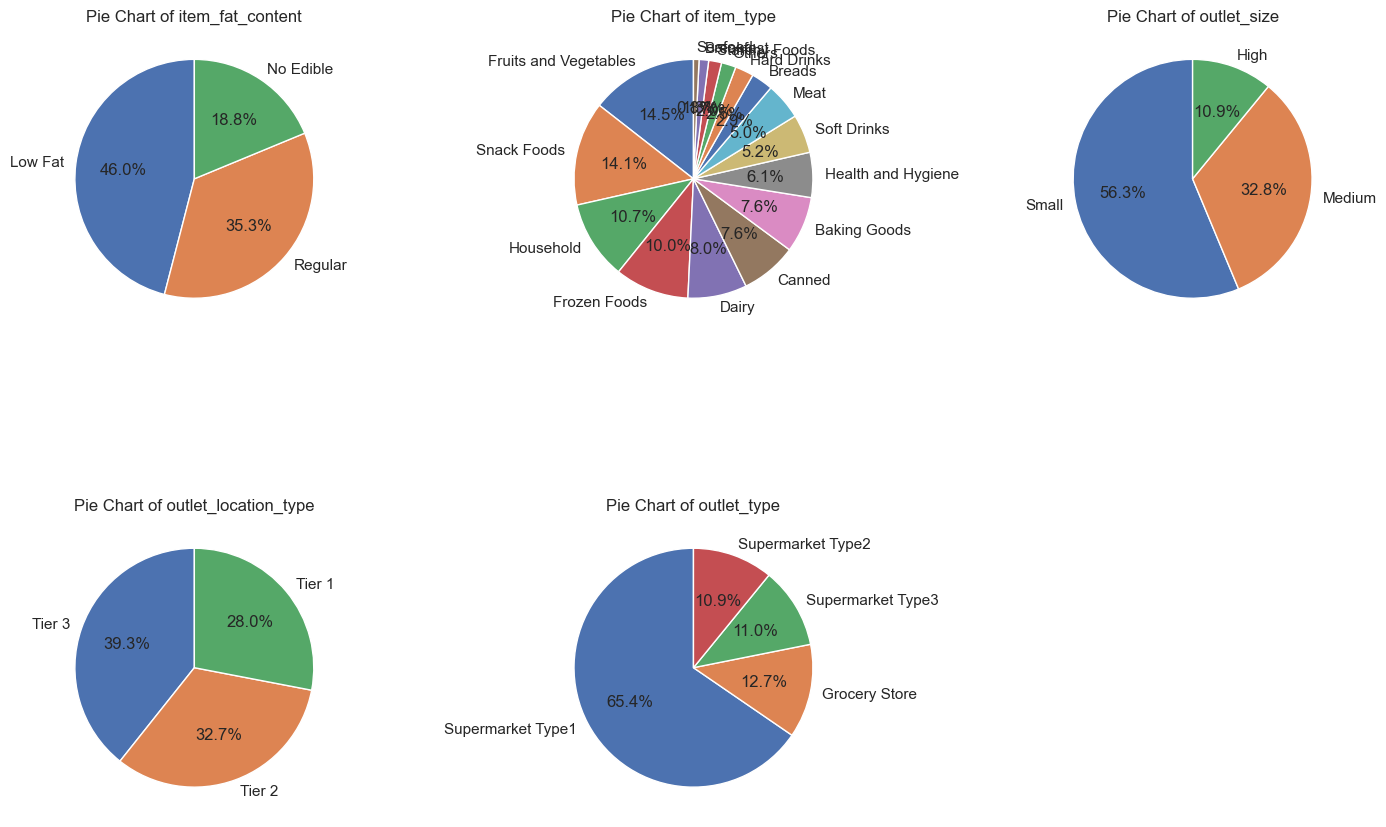

In [56]:

plt.figure(figsize=[15, 30])
for idx,column in enumerate(categorical_cols,start=1):
  plt.subplot(6,3,idx)
  category_counts = df_train[column].value_counts()
  plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
  plt.title(f'Pie Chart of {column}')
  plt.xticks(rotation=90)
  plt.tight_layout(pad=4)
plt.show()

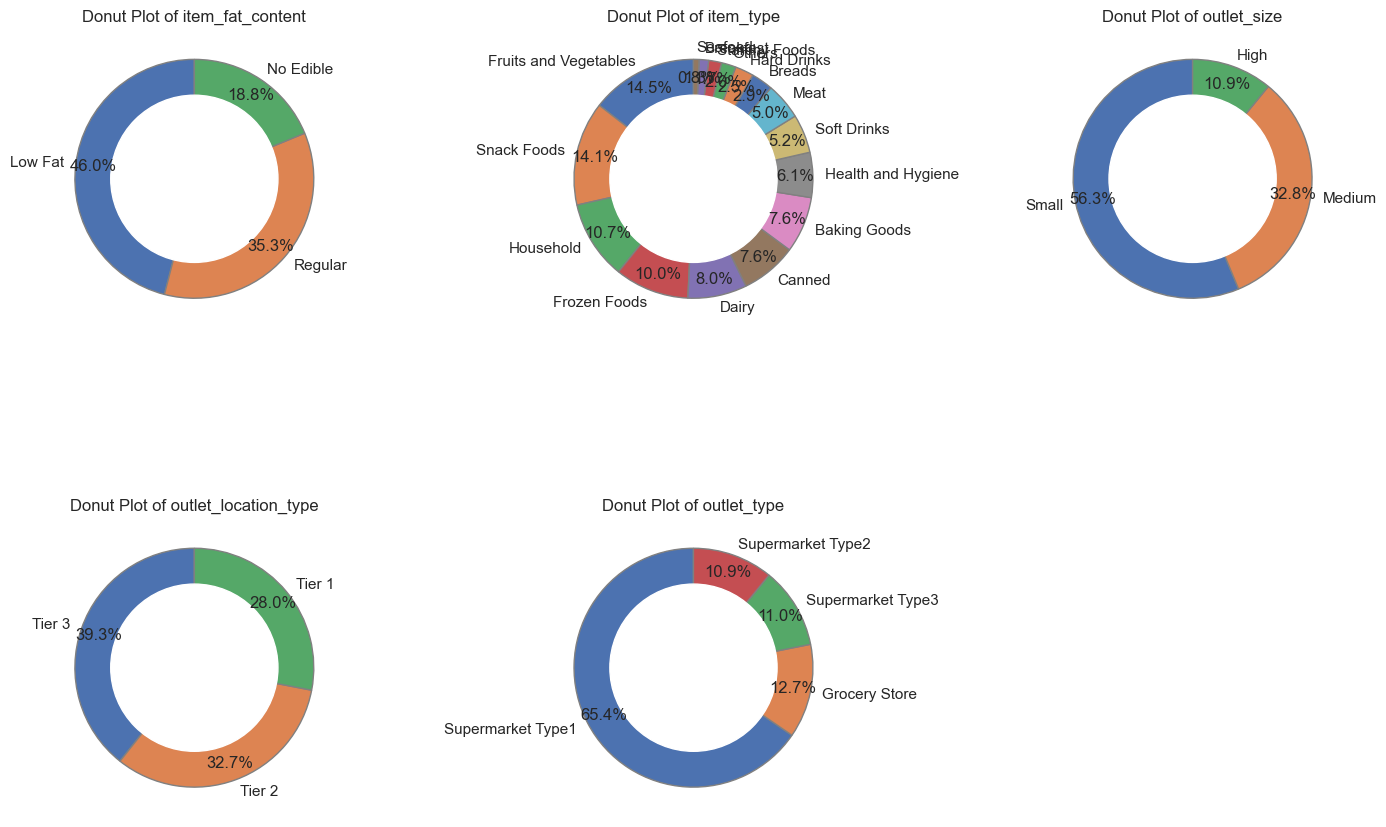

In [57]:

plt.figure(figsize=[15, 30])
for idx,column in enumerate(categorical_cols,start=1):
  plt.subplot(6,3,idx)
  category_counts = df_train[column].value_counts()
  plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85,
        wedgeprops={'edgecolor': 'grey'})
  plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
  plt.title(f'Donut Plot of {column}')
  plt.tight_layout(pad=4)
plt.show()
     

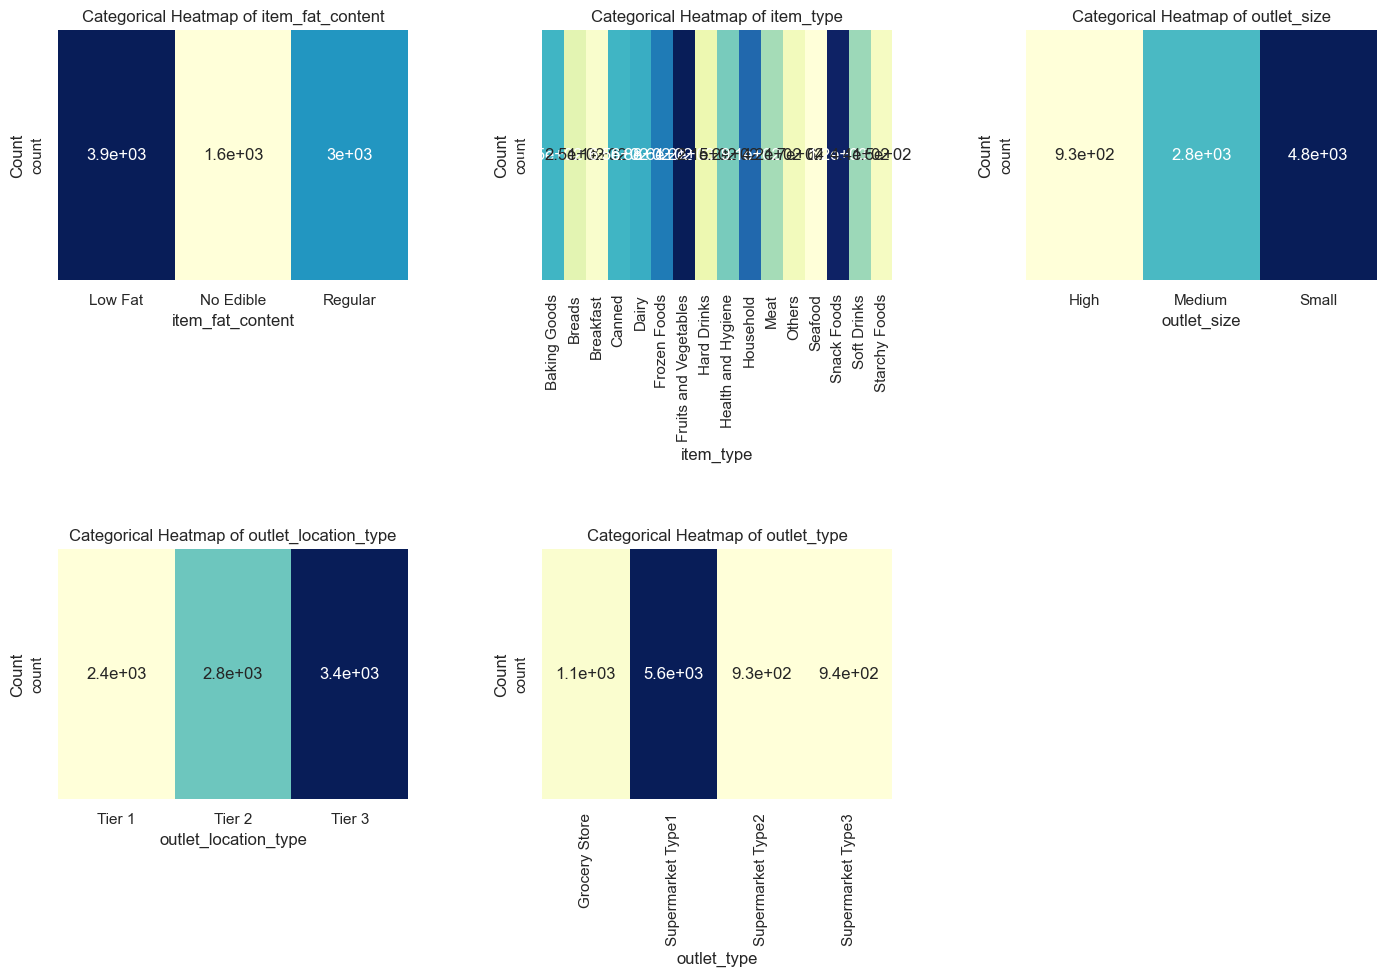

In [58]:
plt.figure(figsize=[15, 30])
for idx,column in enumerate(categorical_cols,start=1):
  plt.subplot(6,3,idx)
  category_counts_matrix = df_train[column].value_counts().sort_index().to_frame().T
  sns.heatmap(category_counts_matrix, annot=True, cmap='YlGnBu', cbar=False)
  plt.xlabel(f'{column}')
  plt.ylabel('Count')
  plt.title(f'Categorical Heatmap of {column}')
  plt.tight_layout(pad=4)
plt.show()
     

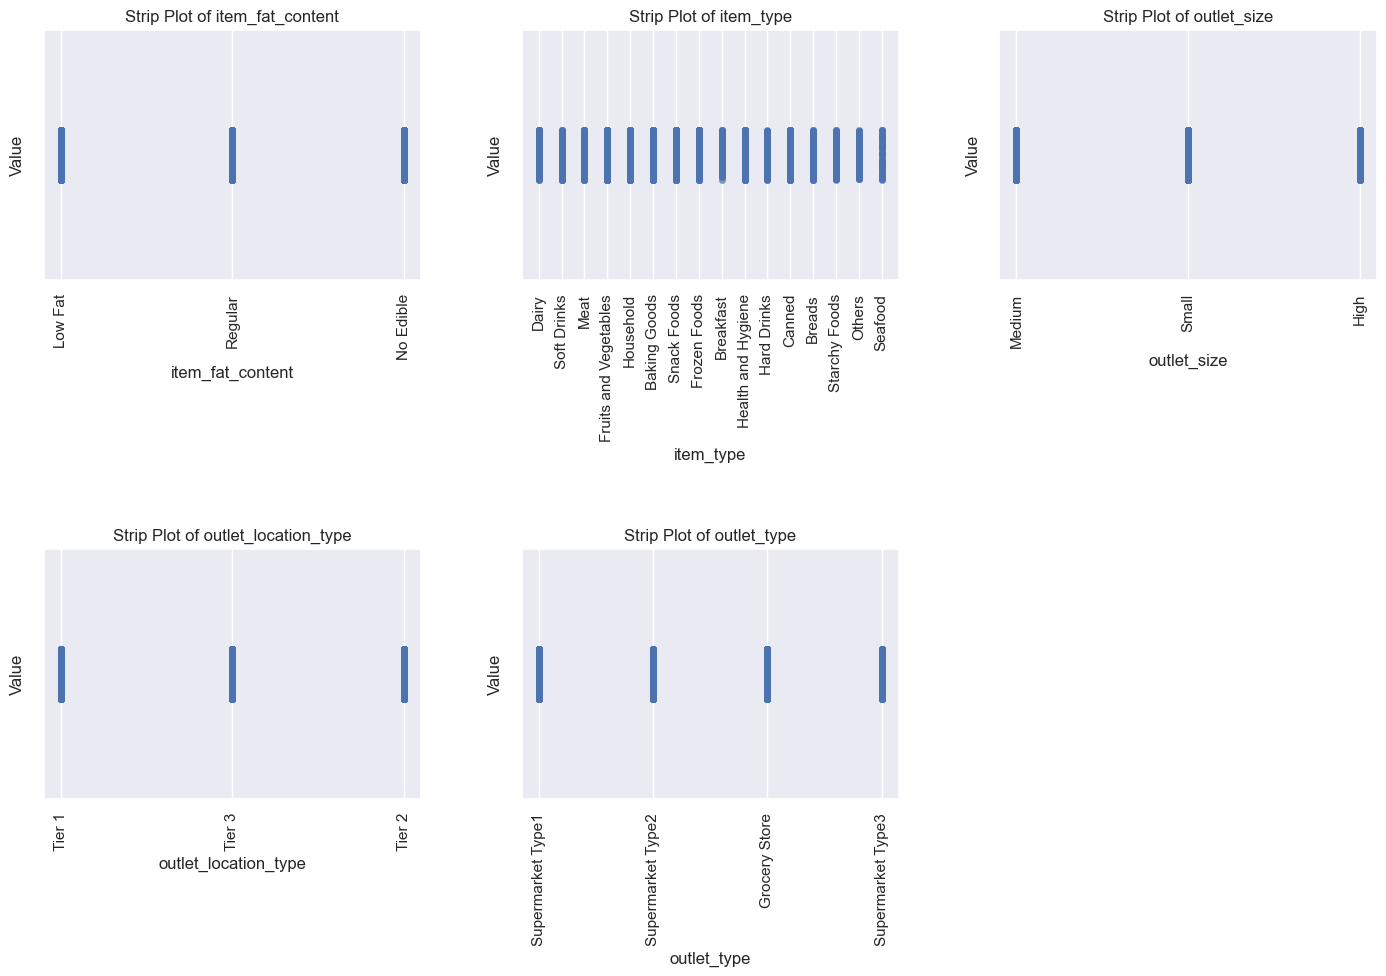

In [59]:
plt.figure(figsize=[15, 30])
for idx,column in enumerate(categorical_cols,start=1):
  plt.subplot(6,3,idx)
  sns.stripplot(x=df_train[column], jitter=True, alpha=0.7)
  plt.xlabel(f'{column}')
  plt.ylabel('Value')
  plt.title(f'Strip Plot of {column}')
  plt.xticks(rotation=90)
  plt.tight_layout(pad=4)
plt.show()
     

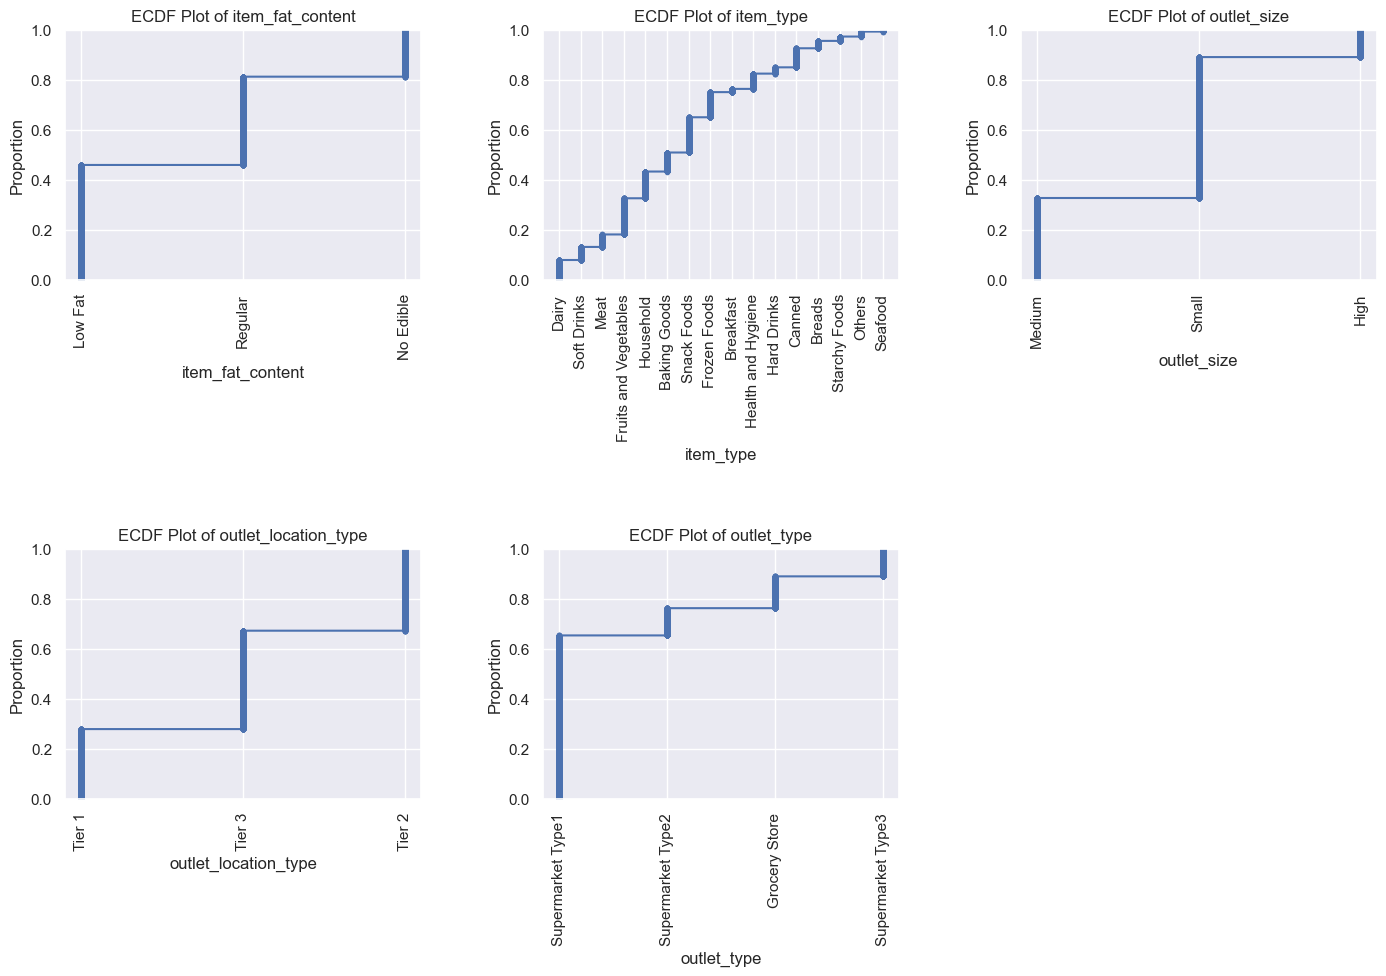

In [60]:
plt.figure(figsize=[15, 30])
for idx,column in enumerate(categorical_cols,start=1):
  plt.subplot(6,3,idx)
  sns.ecdfplot(data=df_train[column], marker='.')
  plt.xlabel(f'{column}')
  plt.ylabel('Proportion')
  plt.title(f'ECDF Plot of {column}')
  plt.xticks(rotation=90)
  plt.tight_layout(pad=4)
plt.show()

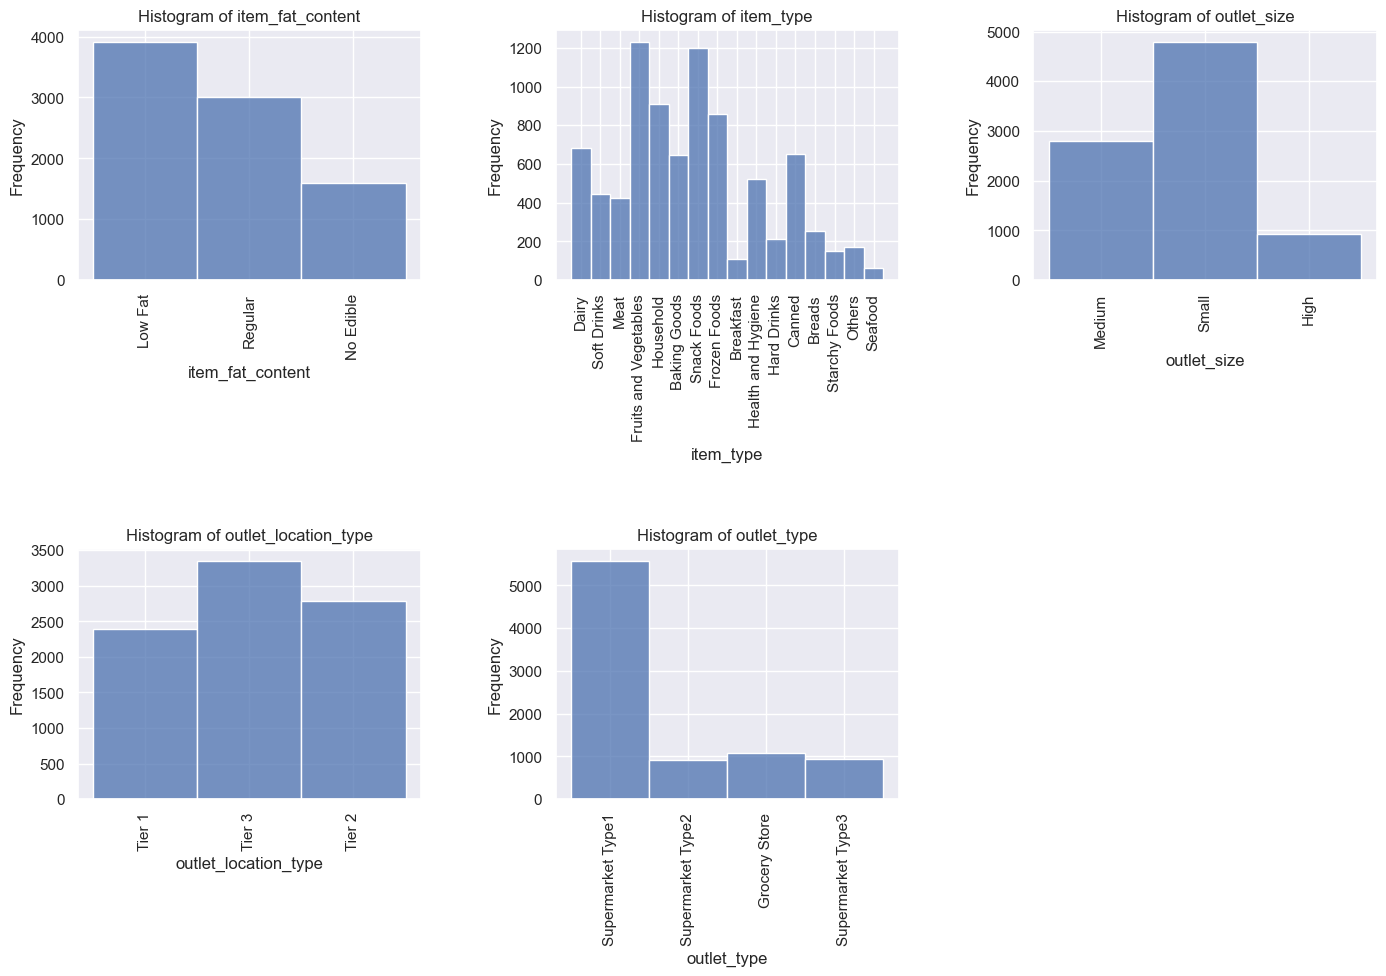

In [61]:
plt.figure(figsize=[15, 30])

for idx, column in enumerate(categorical_cols, start=1):
    plt.subplot(6, 3, idx)
    sns.histplot(data=df_train, x=column, discrete=True, multiple="dodge")
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.xticks(rotation=90)
    plt.tight_layout(pad=4)

plt.show()
     

### Bivariate Analysis


In [62]:
df_train.corr()

ValueError: could not convert string to float: 'FDA15'

In [63]:
from sklearn.preprocessing import LabelEncoder
raw_data=df_train.copy()
raw_data[['item_fat_content', 'item_type', 'outlet_size', 'outlet_location_type', 'outlet_type','item_weight', 'item_visibility', 'item_mrp', 'outlet_establishment_year', 'item_outlet_sales']] =raw_data[['item_fat_content', 'item_type', 'outlet_size', 'outlet_location_type', 'outlet_type','item_weight', 'item_visibility', 'item_mrp', 'outlet_establishment_year', 'item_outlet_sales']].apply(LabelEncoder().fit_transform)
     

df_train.dtypes

item_identifier               object
item_weight                  float64
item_fat_content              object
item_visibility              float64
item_type                     object
item_mrp                     float64
outlet_identifier             object
outlet_establishment_year      int64
outlet_size                   object
outlet_location_type          object
outlet_type                   object
item_outlet_sales            float64
item_category                 object
outlet_years                   int64
dtype: object

In [64]:
corr_df=raw_data.corr()
plt.figure(figsize = (15,8))
sns.heatmap(data = corr_df, annot = True, cmap = "Greens", cbar = True, fmt='.2f')
plt.show()

ValueError: could not convert string to float: 'FDA15'

In [65]:
print(categorical_cols)
print(numerical_cols)

['item_fat_content', 'item_type', 'outlet_size', 'outlet_location_type', 'outlet_type']
['item_weight', 'item_visibility', 'item_mrp', 'outlet_establishment_year', 'item_outlet_sales']


In [66]:
cols_for_scatter=['item_weight', 'item_visibility', 'item_mrp', 'outlet_establishment_year','item_fat_content', 'item_type','outlet_location_type', 'outlet_type']

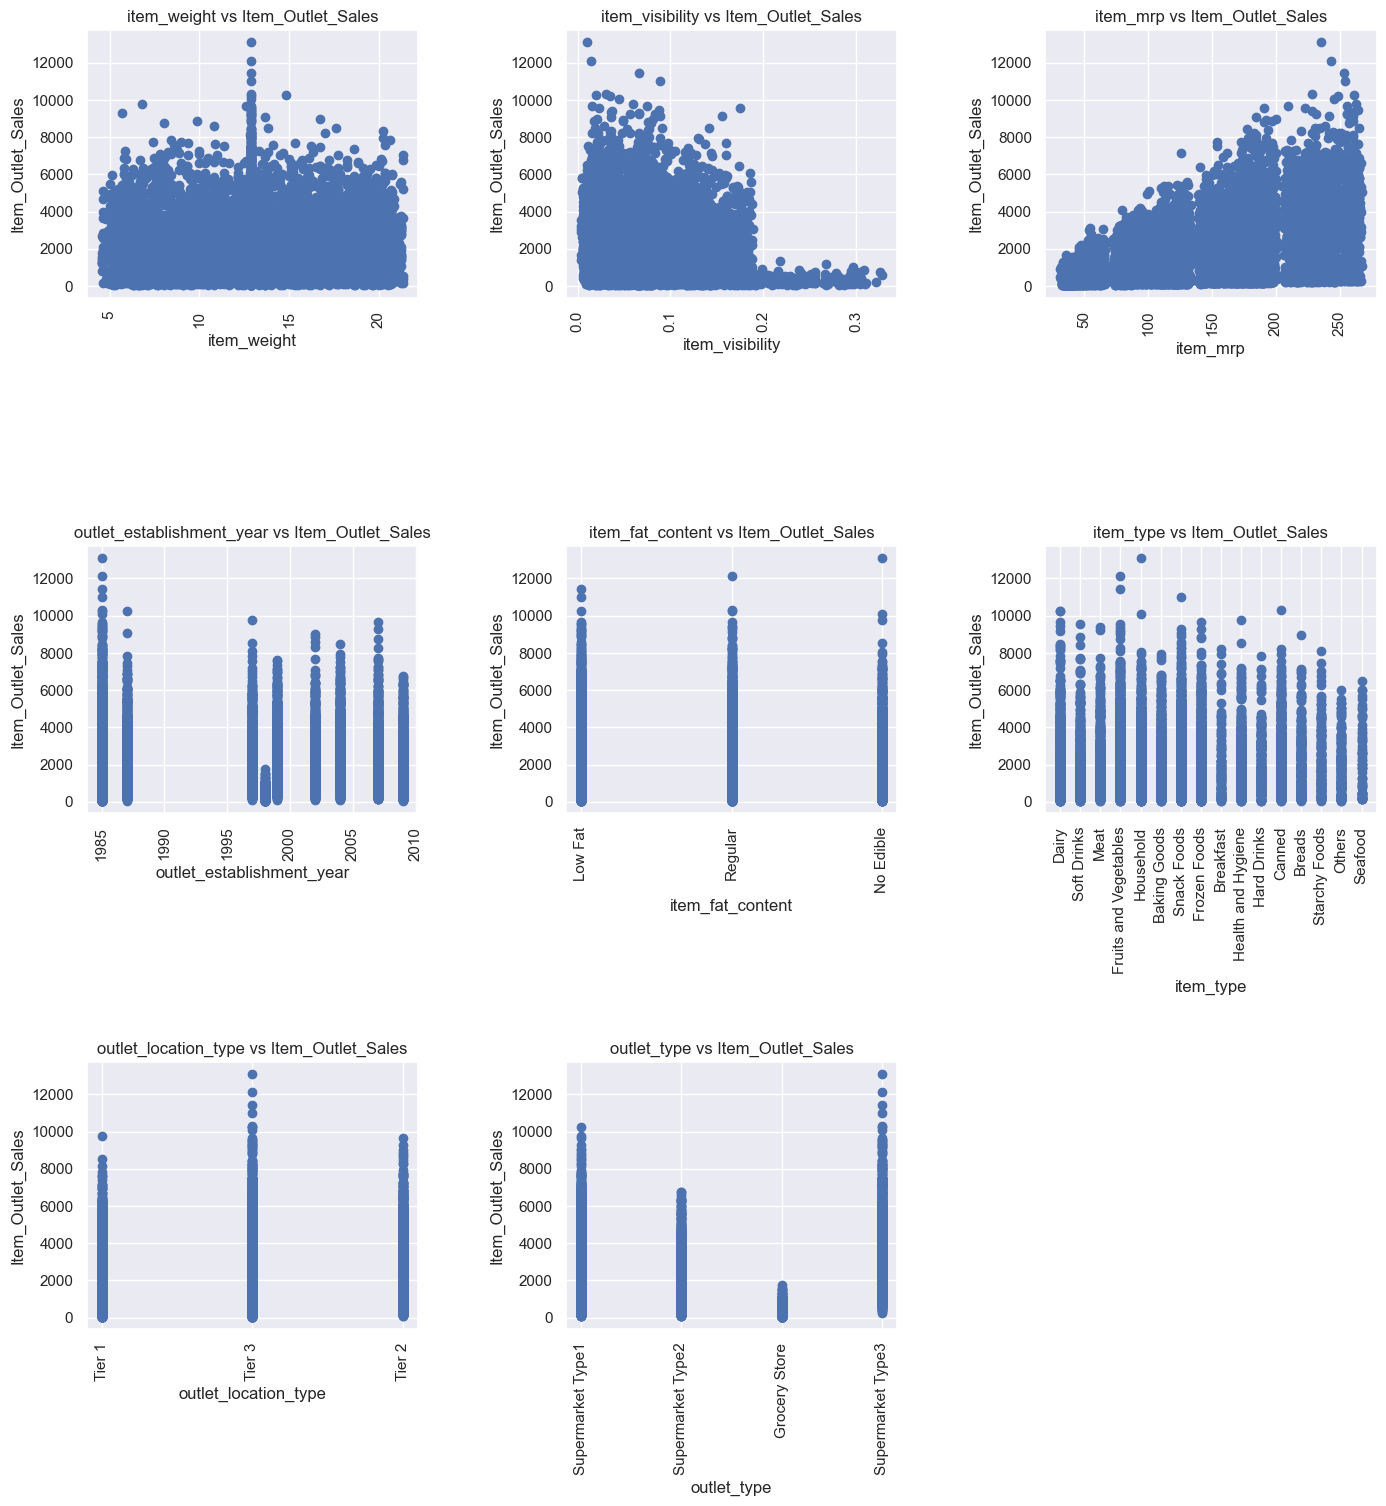

In [67]:
#create scatterplot of hours vs. score
plt.figure(figsize=[15, 30])
for idx, column in enumerate(cols_for_scatter, start=1):
  plt.subplot(6, 3, idx)
  plt.scatter(df_train[column], df_train['item_outlet_sales'])
  plt.title(f'{column} vs Item_Outlet_Sales')
  plt.xlabel(f'{column}')
  plt.ylabel('Item_Outlet_Sales')
  plt.xticks(rotation=90)
  plt.tight_layout(pad=4)
plt.show()
     

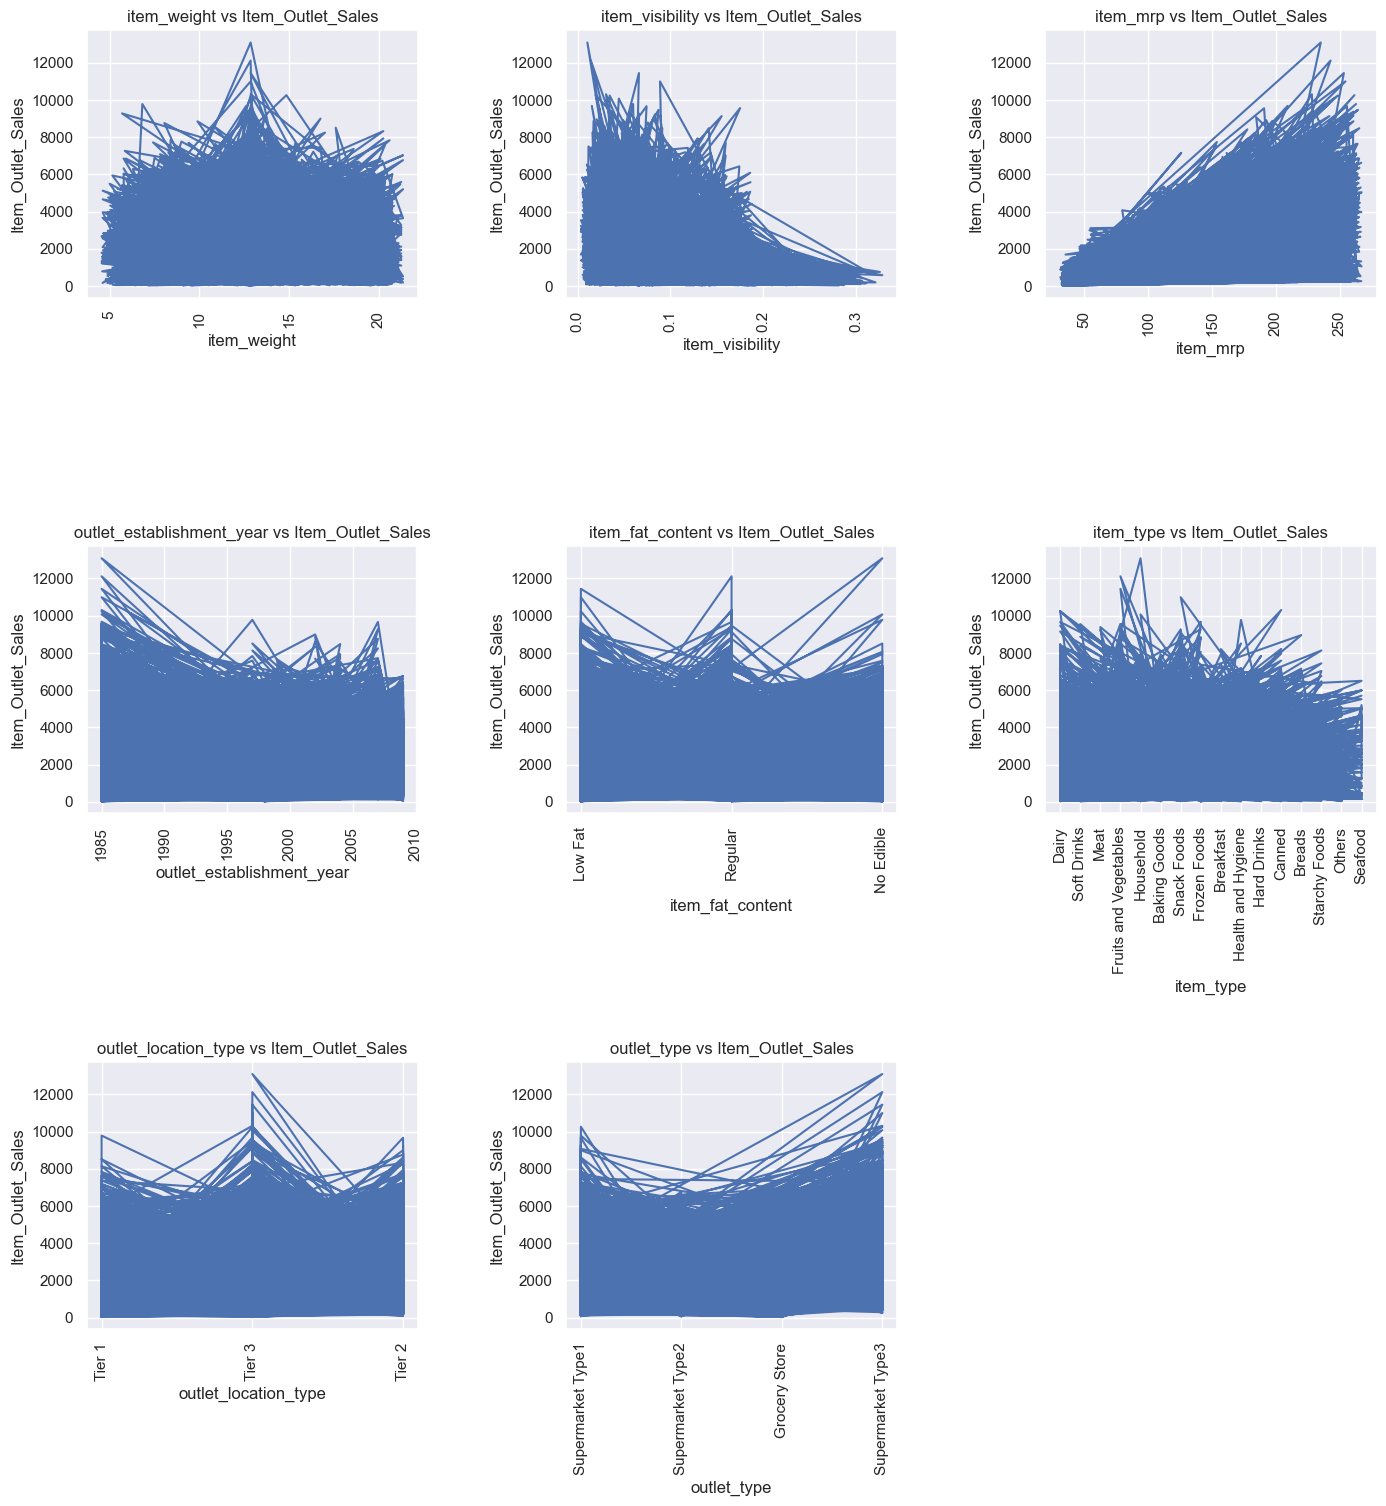

In [68]:
#create line plot of hours vs. score
plt.figure(figsize=[15, 30])
for idx, column in enumerate(cols_for_scatter, start=1):
  plt.subplot(6, 3, idx)
  plt.plot(df_train[column], df_train['item_outlet_sales'])
  plt.title(f'{column} vs Item_Outlet_Sales')
  plt.xlabel(f'{column}')
  plt.ylabel('Item_Outlet_Sales')
  plt.xticks(rotation=90)
  plt.tight_layout(pad=4)
plt.show()

In [69]:
cols_for_bar=['outlet_establishment_year','outlet_type','item_fat_content','item_type','outlet_location_type']

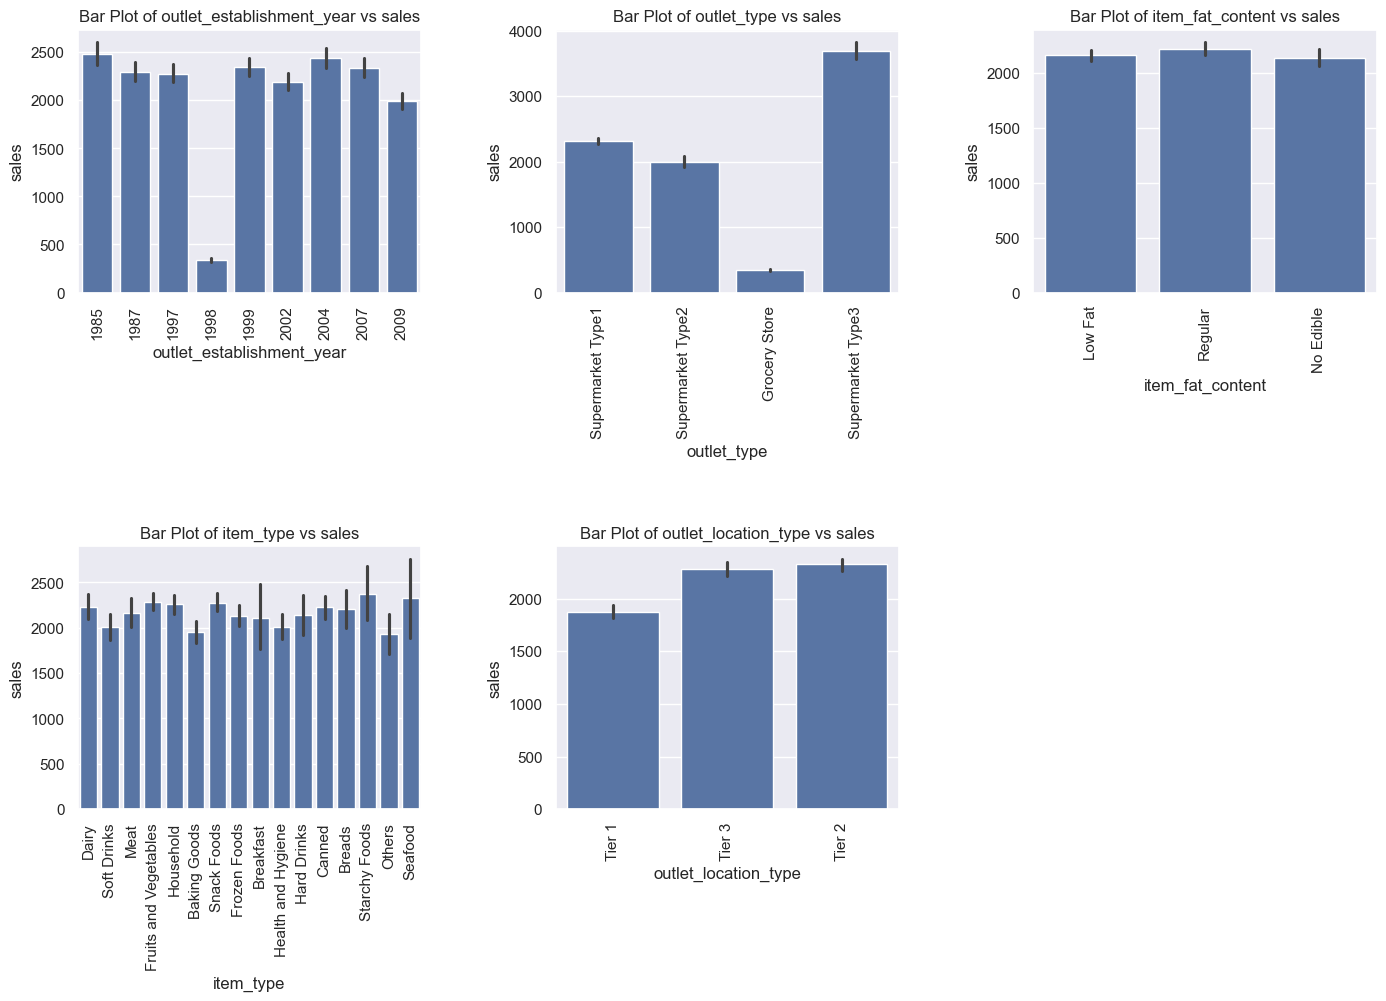

In [70]:

plt.figure(figsize=[15, 30])
for idx, column in enumerate(cols_for_bar, start=1):
  plt.subplot(6, 3, idx)
  sns.barplot(x=df_train[column], y=df_train['item_outlet_sales'])
  plt.xlabel(f'{column}')
  plt.ylabel('sales')
  plt.title(f'Bar Plot of {column} vs sales')
  plt.xticks(rotation=90)
  plt.tight_layout(pad=4)
plt.show()

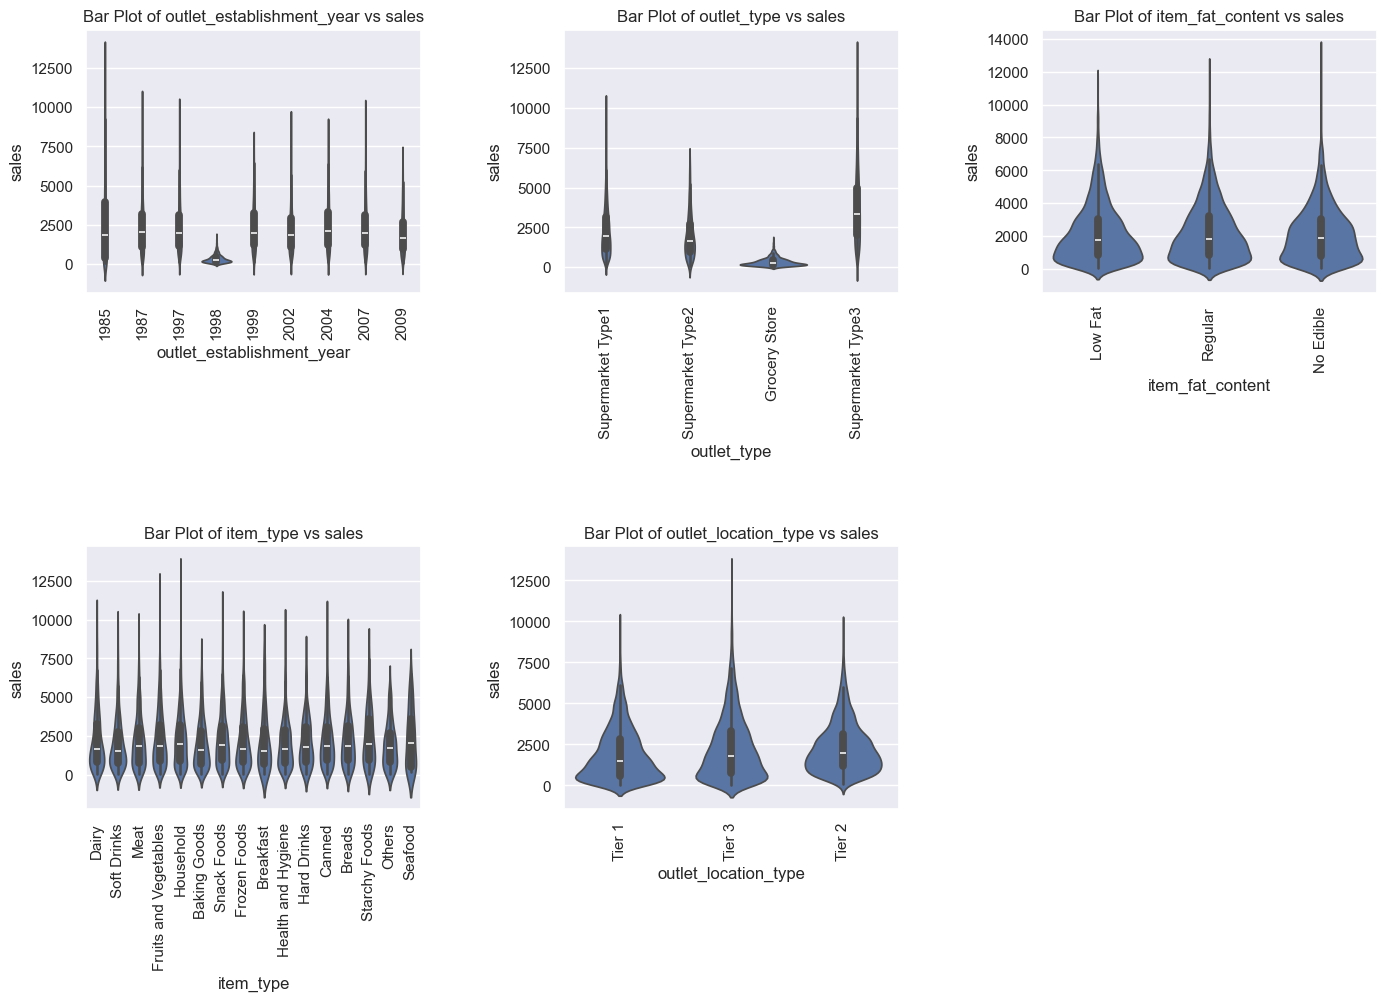

In [71]:
plt.figure(figsize=[15, 30])
for idx, column in enumerate(cols_for_bar, start=1):
  plt.subplot(6, 3, idx)
  sns.violinplot(x=df_train[column], y=df_train['item_outlet_sales'])
  plt.xlabel(f'{column}')
  plt.ylabel('sales')
  plt.title(f'Bar Plot of {column} vs sales')
  plt.xticks(rotation=90)
  plt.tight_layout(pad=4)
plt.show()

### Feature Engineering

In [72]:
df_train=clean_data.copy()

In [73]:
df_train.isnull().sum()

item_identifier              0
item_weight                  0
item_fat_content             0
item_visibility              0
item_type                    0
item_mrp                     0
outlet_identifier            0
outlet_establishment_year    0
outlet_size                  0
outlet_location_type         0
outlet_type                  0
item_outlet_sales            0
item_category                0
outlet_years                 0
dtype: int64

In [74]:
df_train.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,item_category,outlet_years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drink,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,No Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


In [75]:
cols_to_encode=[]

In [76]:
#define bins
bins = [0, 70, 140, 210, 280]

#name of groups
groups = ['Low', 'Med', 'High', 'Exp']

df_train['Item_MRP_Bin_cut'] = pd.cut(df_train['item_mrp'], bins=bins, labels=groups)

df_train[['item_mrp', 'Item_MRP_Bin_cut']].head()

,item_mrp,Item_MRP_Bin_cut
0,249.8092,Exp
1,48.2692,Low
2,141.6180,High
3,182.0950,High
4,53.8614,Low


In [77]:
df_train.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,item_category,outlet_years,Item_MRP_Bin_cut
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14,Exp
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drink,4,Low
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14,High
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15,High
4,NCD19,8.93,No Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26,Low


In [78]:
df_train.isnull().sum()

item_identifier              0
item_weight                  0
item_fat_content             0
item_visibility              0
item_type                    0
item_mrp                     0
outlet_identifier            0
outlet_establishment_year    0
outlet_size                  0
outlet_location_type         0
outlet_type                  0
item_outlet_sales            0
item_category                0
outlet_years                 0
Item_MRP_Bin_cut             0
dtype: int64

In [79]:
df_train.nunique()

item_identifier              1559
item_weight                   416
item_fat_content                3
item_visibility              7880
item_type                      16
item_mrp                     5938
outlet_identifier              10
outlet_establishment_year       9
outlet_size                     3
outlet_location_type            3
outlet_type                     4
item_outlet_sales            3493
item_category                   3
outlet_years                    9
Item_MRP_Bin_cut                4
dtype: int64

In [80]:
df_train

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,item_category,outlet_years,Item_MRP_Bin_cut
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14,Exp
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drink,4,Low
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14,High
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15,High
4,NCD19,8.930,No Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,Food,26,Exp
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,Food,11,Med
8520,NCJ29,10.600,No Edible,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,Non-Consumable,9,Med
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,Food,4,Med


In [81]:
# applying label encoding to some features
encoder = LabelEncoder()
cols_to_encode = [ 'item_type', 'item_fat_content', 'outlet_size', 'outlet_location_type', 'outlet_type','item_category','Item_MRP_Bin_cut']
for col in cols_to_encode:
    df_train[col] = encoder.fit_transform(df_train[col])

In [82]:
df_train.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,item_category,outlet_years,Item_MRP_Bin_cut
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,1,14,0
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,0,4,2
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,1,14,1
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,1998,2,2,0,732.3800,1,15,1
4,NCD19,8.93,1,0.066132,9,53.8614,OUT013,1987,0,2,1,994.7052,2,26,2


Defining the Input Data

In [83]:
# setting model input and target variables
X = df_train.drop(columns=['item_identifier','outlet_identifier','outlet_establishment_year', 'item_outlet_sales'])
y = df_train['item_outlet_sales']

10.Exploring different Models

In [85]:
# df to store model error and scores
model_scores = pd.DataFrame(columns=['model', 'rmse', 'r2_score'])

In [87]:
X

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_size,outlet_location_type,outlet_type,item_category,outlet_years,Item_MRP_Bin_cut
0,9.300,0,0.016047,4,249.8092,1,0,1,1,14,0
1,5.920,2,0.019278,14,48.2692,1,2,2,0,4,2
2,17.500,0,0.016760,10,141.6180,1,0,1,1,14,1
3,19.200,2,0.066132,6,182.0950,2,2,0,1,15,1
4,8.930,1,0.066132,9,53.8614,0,2,1,2,26,2
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,0,2,1,1,26,0
8519,8.380,2,0.046982,0,108.1570,2,1,1,1,11,3
8520,10.600,1,0.035186,8,85.1224,2,1,1,2,9,3
8521,7.210,2,0.145221,13,103.1332,1,2,2,1,4,3


In [89]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: item_outlet_sales, Length: 8523, dtype: float64

In [90]:
# exploring categories
for i in df_train:
    print('-----------------------------')
    print('Series: ', i)
    print('-----------------------------')
    print(df_train[i].value_counts())
    print('\n')

-----------------------------
Series:  item_identifier
-----------------------------
item_identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64


-----------------------------
Series:  item_weight
-----------------------------
item_weight
12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.275000        2
7.685000        1
9.420000        1
6.520000        1
5.400000        1
Name: count, Length: 416, dtype: int64


-----------------------------
Series:  item_fat_content
-----------------------------
item_fat_content
0    3918
2    3006
1    1599
Name: count, dtype: int64


-----------------------------
Series:  item_visibility
-----------------------------
item_visibility
0.066132    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.1

In [92]:
def train_and_evaluate_model(model_name, model, X, y):
    '''
    Create a training pipeline to scale and train the model
    using the input data, then evaluate the model and safe its error
    and score in the scores dataframe.
    '''
    # split the data
    X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)

    # create a training pipeline
    pipeline = make_pipeline(StandardScaler(), model)

    # apply scaling on training data and train the model
    pipeline.fit(X_train, y_train)

    # predict the validation set
    y_hat = pipeline.predict(X_validate)

    # evaluate the model
    rmse = np.sqrt(mean_squared_error(y_validate, y_hat))
    model_score = r2_score(y_validate, y_hat)

    # adding error and score, to the scores datafrane
    model_scores.loc[len(model_scores)] = [model_name, rmse, model_score]
    print('----------------------------------')
    print(model_name, ' Report:')
    print('----------------------------------')
    print('RMSE: ', rmse)
    print('R2 Score: ', model_score)
     

#### Linear Regression

In [93]:
# linear regression
linear_regression_model = LinearRegression()
train_and_evaluate_model('Linear Regression', linear_regression_model, X, y)

----------------------------------
Linear Regression  Report:
----------------------------------
RMSE:  1142.4423217211838
R2 Score:  0.5197980748609401


Ridge Regularisation

In [94]:
# ridge
ridge_model = Ridge()
train_and_evaluate_model('Ridge', ridge_model, X, y)
     

----------------------------------
Ridge  Report:
----------------------------------
RMSE:  1142.438147992442
R2 Score:  0.5198015835350808


Lasso Regularization

In [95]:
# lasso
lasso_model = Lasso()
train_and_evaluate_model('Lasso', lasso_model, X, y)

----------------------------------
Lasso  Report:
----------------------------------
RMSE:  1142.309350679513
R2 Score:  0.5199098515922476


Linear Regression, Ridge, and Lasso Models: The Linear Regression, Ridge, and Lasso models exhibit similar performance based on the RMSE and R2 scores. They all achieve a moderate RMSE value of around 1142 and a consistent R2 score of approximately 0.52. This indicates that these models provide a reasonable fit to the data, but there might be room for improvement in capturing more variance in the target variable.

#### Random Forest

In [96]:
# random forest
rfr_model = RandomForestRegressor()
train_and_evaluate_model('Random Forest', rfr_model, X, y)

----------------------------------
Random Forest  Report:
----------------------------------
RMSE:  1088.409977035702
R2 Score:  0.5641466796632274


The Random Forest model stands out with a lower RMSE of 1094 and a relatively higher R2 score of 0.56. These scores suggest that the Random Forest model performs notably better compared to the linear-based models. It demonstrates improved accuracy in predicting the target variable and captures more variance in the data.

#### XGBoost

In [97]:
# xgboost
xgbr_model = XGBRegressor()
train_and_evaluate_model('XGBoost', xgbr_model, X, y)

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


----------------------------------
XGBoost  Report:
----------------------------------
RMSE:  1110.7627162264714
R2 Score:  0.5460605593443448


The XGBoost model also performs well, with an RMSE of 1117 and an R2 score of 0.54. While it falls between the performance of the linear-based models and the Random Forest model, it still provides a reasonable fit and prediction accuracy.

#### Model Score Summary

In [98]:
# display model scores
model_scores

,model,rmse,r2_score
0,Linear Regression,1142.442322,0.519798
1,Ridge,1142.438148,0.519802
2,Lasso,1142.309351,0.519910
3,Random Forest,1088.409977,0.564147
4,XGBoost,1110.762716,0.546061


#### Testing The Chosen Model

Train the model with all the training data

In [99]:
# train a Linear Regression model with all the data
model_pipeline = make_pipeline(StandardScaler(), LinearRegression())
model_pipeline.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

Reading and preparing the test data

In [101]:
# loading the test data
test_data=pd.read_csv('test_bb.csv')

test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [104]:
# Here basically is done the same data preprocessing that was done before for the training data


# format column names to be lower-case
new_col_names = [col.lower() for col in test_data.columns]
test_data.columns = new_col_names

# creating a new df to show the results of each datapoint at the end of the notebook
results = test_data[['item_identifier', 'outlet_identifier']]

# fill null values - item_weight
test_data['item_weight'].fillna(test_data['item_weight'].mean(), inplace=True)

# fill null values - outlet_size
missing_values = test_data['outlet_size'].isnull()
test_data.loc[missing_values, 'outlet_size'] = test_data.loc[missing_values, 'outlet_type'].apply(lambda x: outlet_size_mode_pt[x].outlet_size)

# replace 0s - item_visibility
test_data.loc[:,'item_visibility'].replace(to_replace=0,
                                            value=test_data['item_visibility'].mean(),
                                            inplace=True)

# create a new feature - item_category
test_data['item_category'] = test_data['item_identifier'].apply(lambda x: x[:2])
test_data['item_category'] = test_data['item_category'].replace({'FD':'Food', 'DR':'Drink', 'NC':'Non-Consumable'})

# create a new feature - outlet_years
test_data['outlet_years'] = 2013 - test_data['outlet_establishment_year']


# IMPORTANT: The same labels that were added during the training process must be added
# label encoding


# IMPORTANT: The feature labels that were added during the training process must be added
# adding missing features
#test_data['item_fat_content_No Edible'] = 0
#test_data['item_fat_content_Regular'] = 0
#test_data['outlet_size_High'] = 0
#test_data['item_category_Drink'] = 0
#test_data['item_category_Non-Consumable'] = 0

# drop unnecessary features
test_data = test_data.drop(columns=['outlet_establishment_year'])

# IMPORTANT: The features must match the same order as the training data
# re-order columns
test_data = test_data[['item_identifier',
                       'item_weight',
                       'item_visibility',
                       'item_type',
                       'item_mrp',
                       'outlet_identifier',
                       'outlet_years',
                       'item_fat_content',
                       'outlet_size',
                       'outlet_location_type',
                       'outlet_type',
                       'item_category']]

KeyError: 'outlet_establishment_year'

In [105]:
#define bins
bins = [0, 70, 140, 210, 280]

#name of groups
groups = ['Low', 'Med', 'High', 'Exp']

test_data['Item_MRP_Bin_cut'] = pd.cut(test_data['item_mrp'], bins=bins, labels=groups)

test_data[['item_mrp', 'Item_MRP_Bin_cut']].head()

,item_mrp,Item_MRP_Bin_cut
0,107.8622,Med
1,87.3198,Med
2,241.7538,Exp
3,155.0340,High
4,234.2300,Exp


In [106]:
X = df_train.drop(columns=['item_identifier','outlet_identifier','outlet_establishment_year','item_outlet_sales'])

In [107]:
test_data=test_data.drop(columns=['item_identifier','outlet_identifier'])

In [108]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['item_fat_content', 'item_type', 'outlet_size', 'outlet_location_type', 'outlet_type', 'item_category', 'Item_MRP_Bin_cut']

# Iterate through each categorical column
for col in categorical_columns:
    # Fit the encoder on the training data
    label_encoder.fit(test_data[col])

    # Transform the test data using the same encoder
    test_data[col] = label_encoder.transform(test_data[col])

In [109]:
X = df_train.drop(columns=['outlet_establishment_year'])

In [110]:
correct_order=['item_weight','item_fat_content','item_visibility','item_type','item_mrp','outlet_size','outlet_location_type','outlet_type','item_category','outlet_years','Item_MRP_Bin_cut']
test_data=test_data[correct_order]

In [111]:
# predict the testing data
y_hat = model_pipeline.predict(test_data)

# displaying results
results['prediction'] = y_hat
results

C:\Users\USER\AppData\Local\Temp\ipykernel_10412\3162532169.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['prediction'] = y_hat


,item_identifier,outlet_identifier,prediction
0,FDW58,OUT049,1968.617916
1,FDW14,OUT017,1275.887682
2,NCN55,OUT010,2193.423481
3,FDQ58,OUT017,2291.044730
4,FDY38,OUT027,5054.513195
...,...,...,...
5676,FDB58,OUT046,2387.696459
5677,FDD47,OUT018,3082.158654
5678,NCO17,OUT045,1570.959422
5679,FDJ26,OUT017,3161.453603


In [112]:
# exploring categories
for i in results:
    print('-----------------------------')
    print('Series: ', i)
    print('-----------------------------')
    print(results[i].value_counts())
    print('\n')
     

-----------------------------
Series:  item_identifier
-----------------------------
item_identifier
DRF48    8
FDZ50    8
FDQ60    8
FDN52    8
FDW10    8
        ..
FDW49    1
FDG38    1
FDD38    1
FDA15    1
FDF04    1
Name: count, Length: 1543, dtype: int64


-----------------------------
Series:  outlet_identifier
-----------------------------
outlet_identifier
OUT027    624
OUT013    621
OUT049    620
OUT046    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: count, dtype: int64


-----------------------------
Series:  prediction
-----------------------------
prediction
1968.617916    1
3544.112725    1
1638.954206    1
382.496464     1
1115.076901    1
              ..
1697.524533    1
3435.760395    1
712.686976     1
419.888647     1
981.041125     1
Name: count, Length: 5681, dtype: int64




### Conclusion

In summary, the Random Forest model appears to be the most effective among the models considered. It achieves the lowest RMSE, indicating that its predictions are closest to the actual values on average. Additionally, the higher R2 score of the Random Forest model suggests that it explains a greater proportion of the variance in the target variable. While the XGBoost model also performs well, the Random Forest model demonstrates superior performance in this specific context. Consider further tuning and validation to ensure the chosen model's robustness and applicability to real-world scenarios.